## 1. 음주 여부에 따라 건강검진 수치 차이가 있을까?

## 2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

## 4. 한글폰트 설정

In [2]:
# 코랩으로 한다면 한글 설정을 따로해야한다.

In [3]:
import os
if os.name == 'posix':
    plt.rc("font",family="AppleGothic")
else:
    plt.rc("font",family="Malgun Gothic")
    
#마이너스 폰트가 깨지는 문제를 대처하기 위해
plt.rc("axes",unicode_minus=False)

In [4]:
#글자가 흐릿하게 보이는 현상을 막기 위해 레티나 설정
%config InlineBackend.figure_format = 'retina'

## 5. 데이터 불러오기

In [5]:
df = pd.read_csv("data/NHIS_OPEN_GJ_2017.csv",encoding="cp949")
df.shape
#백만개 데이터 (대용량 데이터)

(1000000, 34)

## 5.1 데이터 미리보기

In [6]:
#sample, head,tail을 통해 데이터를 미리 볼 수있다,
df.head(1)

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0   1.0         1      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  

[1 rows x 34 columns]

In [7]:
#아무거나 랜덤으로 sampling진행한다.
df.sample(2)

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
397108  2017   397109     1           11    48        165         60  70.0   
185464  2017   185465     2            9    11        160         45  65.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
397108    1.5    1.0  ...   19.0   2.0   1.0         1      NaN    NaN   
185464    1.0    1.0  ...   46.0   1.0   1.0         0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
397108      NaN           NaN  1.0  20181126  
185464      NaN           NaN  NaN  20181126  

[2 rows x 34 columns]

## 6.기본정보 보기

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
기준년도            1000000 non-null int64
가입자일련번호         1000000 non-null int64
성별코드            1000000 non-null int64
연령대코드(5세단위)     1000000 non-null int64
시도코드            1000000 non-null int64
신장(5Cm단위)       1000000 non-null int64
체중(5Kg단위)       1000000 non-null int64
허리둘레            999734 non-null float64
시력(좌)           999817 non-null float64
시력(우)           999811 non-null float64
청력(좌)           999842 non-null float64
청력(우)           999844 non-null float64
수축기혈압           999981 non-null float64
이완기혈압           999982 non-null float64
식전혈당(공복혈당)      999958 non-null float64
총콜레스테롤          999957 non-null float64
트리글리세라이드        999955 non-null float64
HDL콜레스테롤        999956 non-null float64
LDL콜레스테롤        997088 non-null float64
혈색소             999948 non-null float64
요단백             995408 non-null float64
혈청크레아티닌         999957 non-null float64
(혈청지오티)AST     

In [9]:
#컬럼만 따로 출력한다,
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [10]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

## 7. 결측치 보기

In [11]:
#isnulll을 통해 결측치를 bool 값으로 표시하고 sum을 하면 열마다 수를 세어줌
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

In [12]:
#isna로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 집계할 수 있다.
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

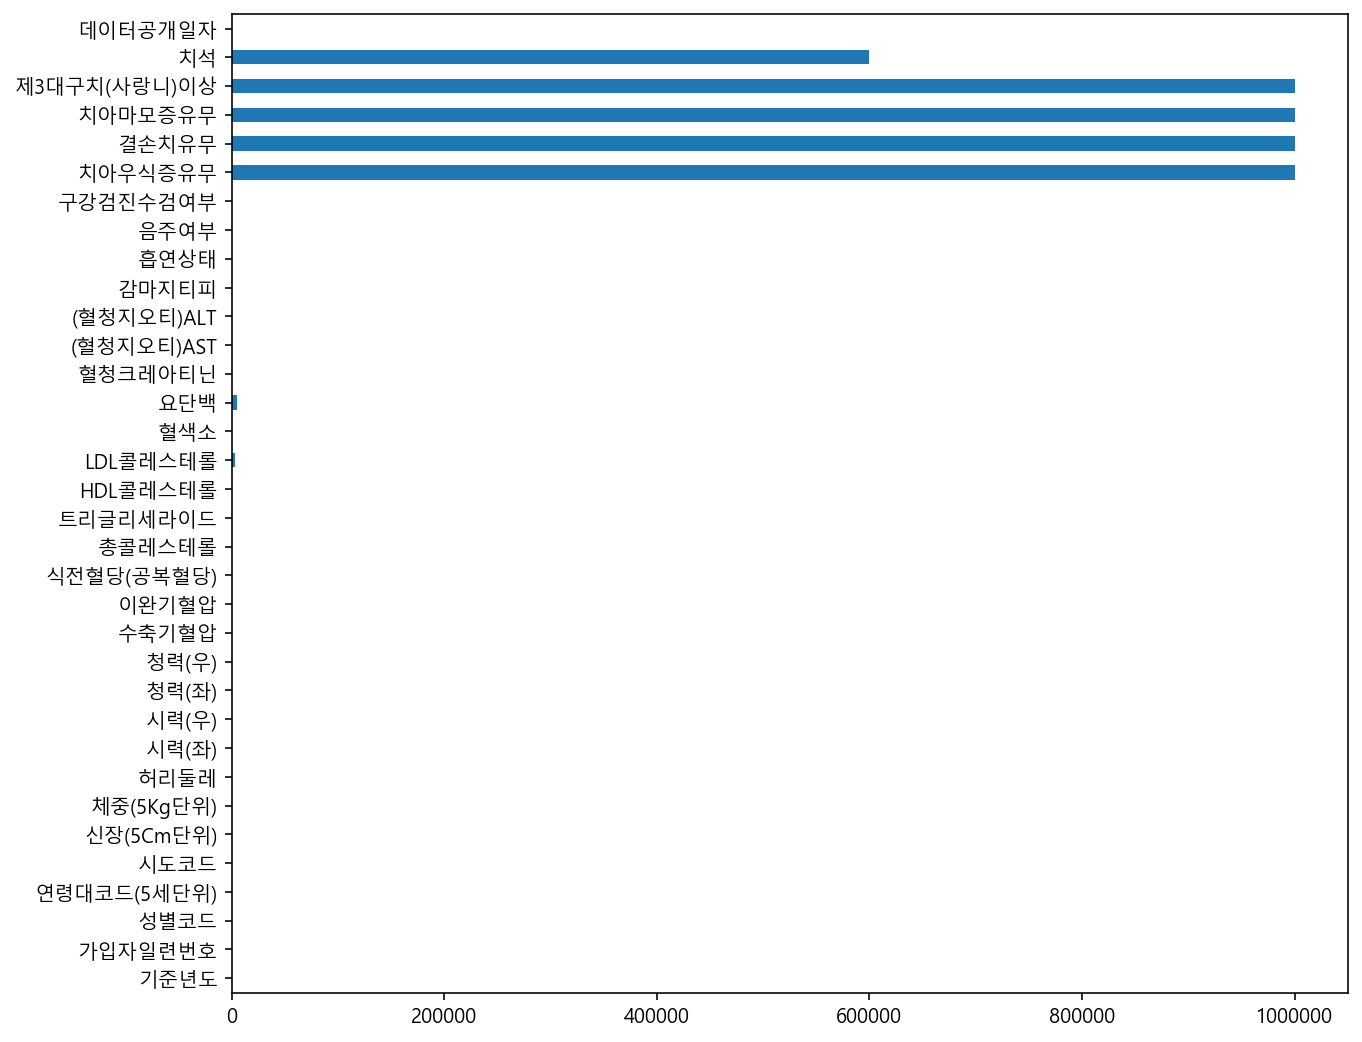

In [13]:
#판다스에 내장된 plot을 통해 시각화를 합니다.
#barh 가로로 그래프 그리기
df.isnull().sum().plot.barh(figsize=(10,9))

## 8.일부 데이터 요약하기

In [14]:
#"(혈청지오티)ALT","(혈청지오티)AST"를 가져와 미리보기 합니다.
#2개의 열을 가져올면 list형태로 만들어 줘야한다.[[]]
df[["(혈청지오티)ALT","(혈청지오티)AST"]].head()

(혈청지오티)ALT  (혈청지오티)AST
0        35.0        21.0
1        36.0        20.0
2        32.0        47.0
3        34.0        29.0
4        12.0        19.0

In [15]:
df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999958.000000  999959.000000
mean       25.749509      25.994671
std        26.294770      23.587469
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        29.000000      28.000000
max      7210.000000    9999.000000

## 9.value_counts로 값 집계하기

In [16]:
#value_counts를 통해 성별로 그룹화 하고 갯수를 집계합니다.
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [17]:
#value_counts를 통해 흡연상태로 그룹화 하고 갯수를 집계합니다.
df['흡연상태'].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

## 10. group by와 pivot_table 사용하기

### 10.1 groupby

In [18]:
df.groupby(['성별코드'])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [19]:
df.groupby(["성별코드","음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     173612
      1.0     356587
2     0.0     326827
      1.0     142438
Name: 가입자일련번호, dtype: int64

In [20]:
df.groupby(["성별코드","음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.739868
      1.0     56.610981
2     0.0     22.612408
      1.0     25.001018
Name: 감마지티피, dtype: float64

In [21]:
#성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구합니다.
#max값 때문에 평균이 조금 편향이 되었겠다. 라고 생각 할 수 있다.
df.groupby(["성별코드","음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [22]:
# agg를 사용하면 여러 수치를 함께 구할 수 있습니다.
df.groupby(["성별코드","음주여부"])["감마지티피"].agg(
    ["count","mean","median"])

count       mean  median
성별코드 음주여부                           
1    0.0   173604  34.739868    25.0
     1.0   356576  56.610981    37.0
2    0.0   326813  22.612408    17.0
     1.0   142429  25.001018    17.0

### 10.2 pivot_table
    groupby와 pivot_table의 가장 큰 차이점은 series로 반환 되느냐 df로 반환 되느냐 차이

    좀 더 직관적이다.

In [23]:
#음주여부에 따른 그룹화된 수를 피봇데이블로 구힙니다.

df.pivot_table(index="음주여부",values ="가입자일련번호",aggfunc="count")

가입자일련번호
음주여부         
0.0    500439
1.0    499025

In [24]:
#음주여부에 따른 감마지티피의 평균을 구합니다.
#높은 이상치가 존재하기 때문에 mean값보다 median값을 보는게
#더 적합하다고 볼 수도 있다.
pd.pivot_table(df,index="음주여부",values="감마지티피",
               aggfunc=["mean","median","max"])

mean median    max
          감마지티피  감마지티피  감마지티피
음주여부                         
0.0   26.819650   19.0  999.0
1.0   47.588675   30.0  999.0

In [25]:
pd.pivot_table(df,index="음주여부",values="감마지티피",
               aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부                                                              
0.0   14.0  19.0  29.0  500417.0  999.0  26.819650  1.0  30.639714
1.0   18.0  30.0  52.0  499005.0  999.0  47.588675  1.0  63.056912

In [26]:
#aggfunc도 여러가지 지정할 수 있다. 기본 값은 mean 값이다.
#describe를 사용해 통게요약값을 한번에 볼 수도 있다.
pd.pivot_table(df,index=["성별코드","음주여부"],values="감마지티피",
               aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     1.0   24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    0.0   13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     1.0   13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

## 11. 전체데이터 시각화 하기

- 100만개가 넘는 데이터를 시각화할 때는 되도록이면 groupby 혹은 pivot_table로 연산을 하고 시각화를 하는 것을 권장합니다.

- 100만개가 넘는 데이터를 seaborn과 같은 통계 연산을 하는 그래프를 사용하게 되면 많이 느릴 수 있습니다.

### 11.1 히스토그램

In [27]:
df.info() #를통해 대부분 수치데이터로 이루어 진것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
기준년도            1000000 non-null int64
가입자일련번호         1000000 non-null int64
성별코드            1000000 non-null int64
연령대코드(5세단위)     1000000 non-null int64
시도코드            1000000 non-null int64
신장(5Cm단위)       1000000 non-null int64
체중(5Kg단위)       1000000 non-null int64
허리둘레            999734 non-null float64
시력(좌)           999817 non-null float64
시력(우)           999811 non-null float64
청력(좌)           999842 non-null float64
청력(우)           999844 non-null float64
수축기혈압           999981 non-null float64
이완기혈압           999982 non-null float64
식전혈당(공복혈당)      999958 non-null float64
총콜레스테롤          999957 non-null float64
트리글리세라이드        999955 non-null float64
HDL콜레스테롤        999956 non-null float64
LDL콜레스테롤        997088 non-null float64
혈색소             999948 non-null float64
요단백             995408 non-null float64
혈청크레아티닌         999957 non-null float64
(혈청지오티)AST     

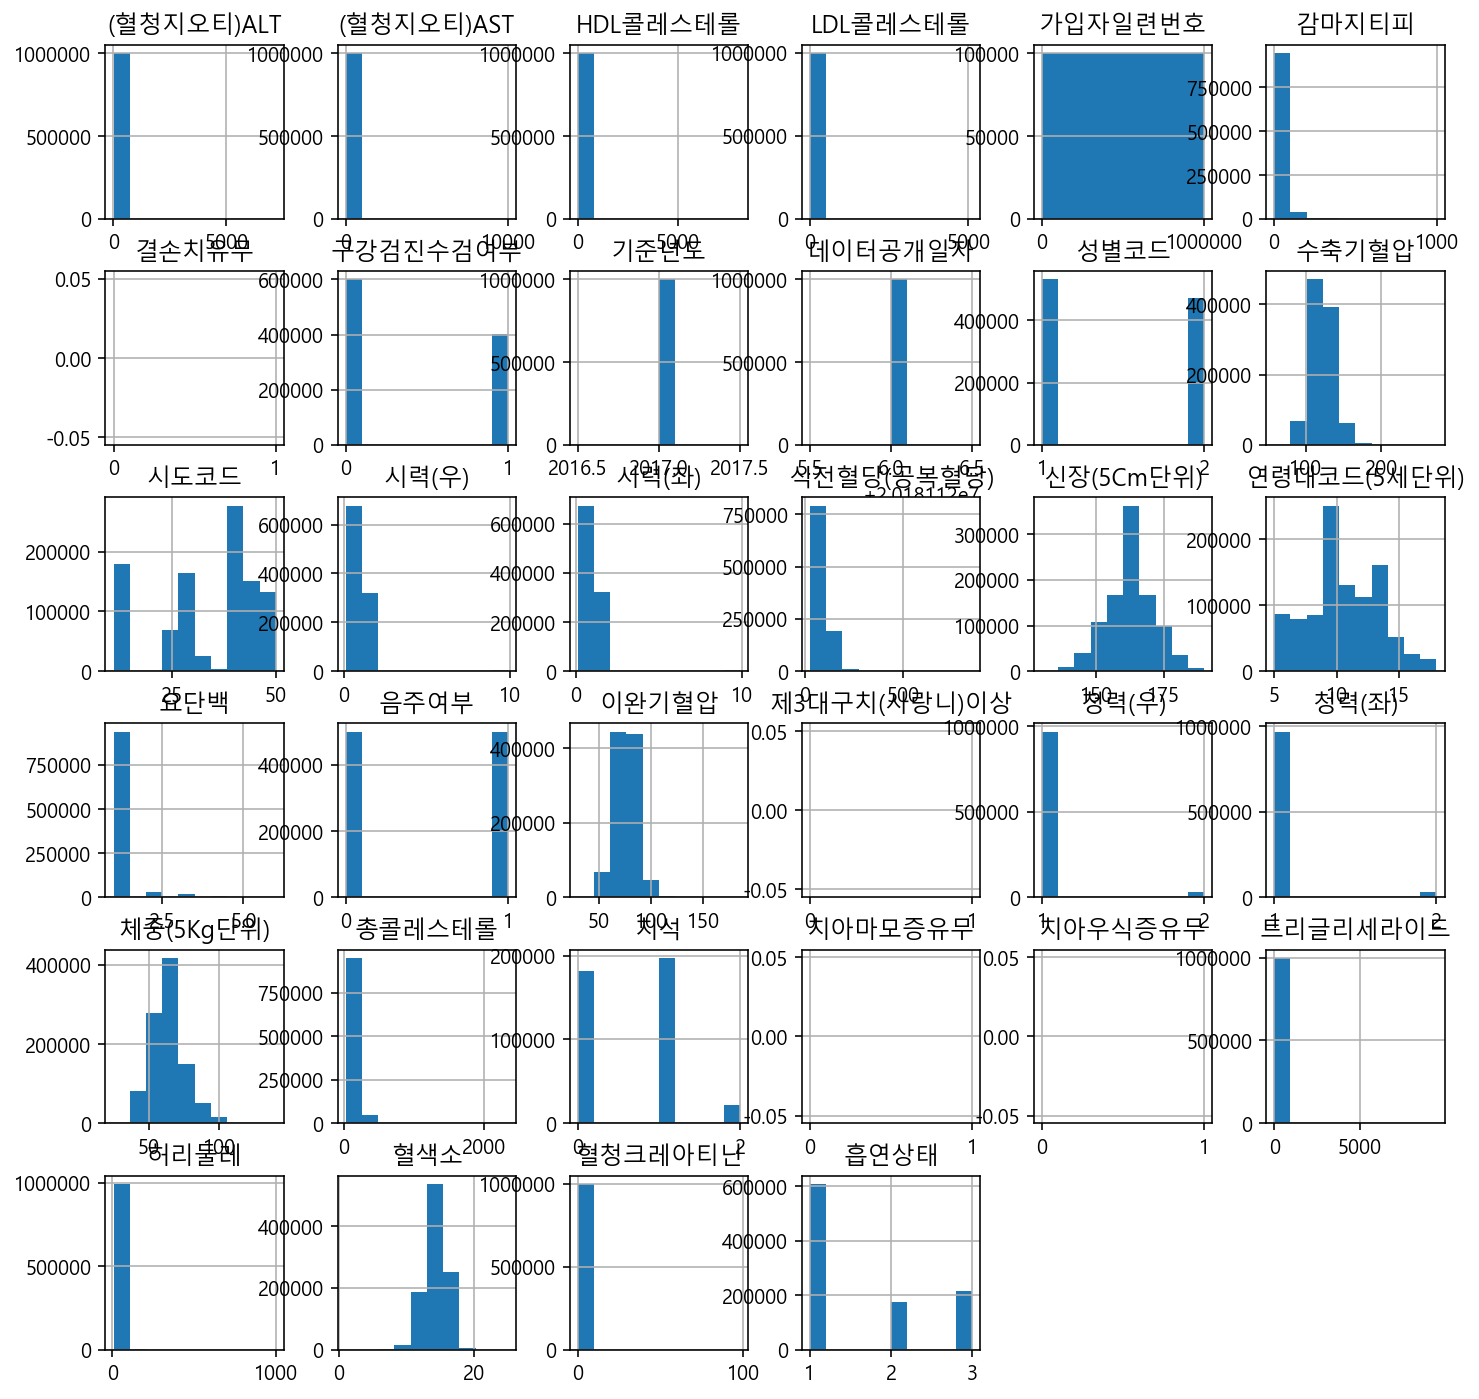

In [28]:
b = df.hist(figsize=(12,12)) #전체 데이터에 대한 히스토그램을 출력

## 11.2 슬라이싱을 사용해 히스토그램 그리기

- 슬라이싱 사용히 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능
- iloc[행,열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할 때는 [:,:]을 사용합니다.
- 슬라이싱을 해주는 대괄호 안의 클론 앞뒤에 숫자를 써주게 되면 해당 시작인덱스:끝나는인덱스(+1)을 지정할 수 있습니다.

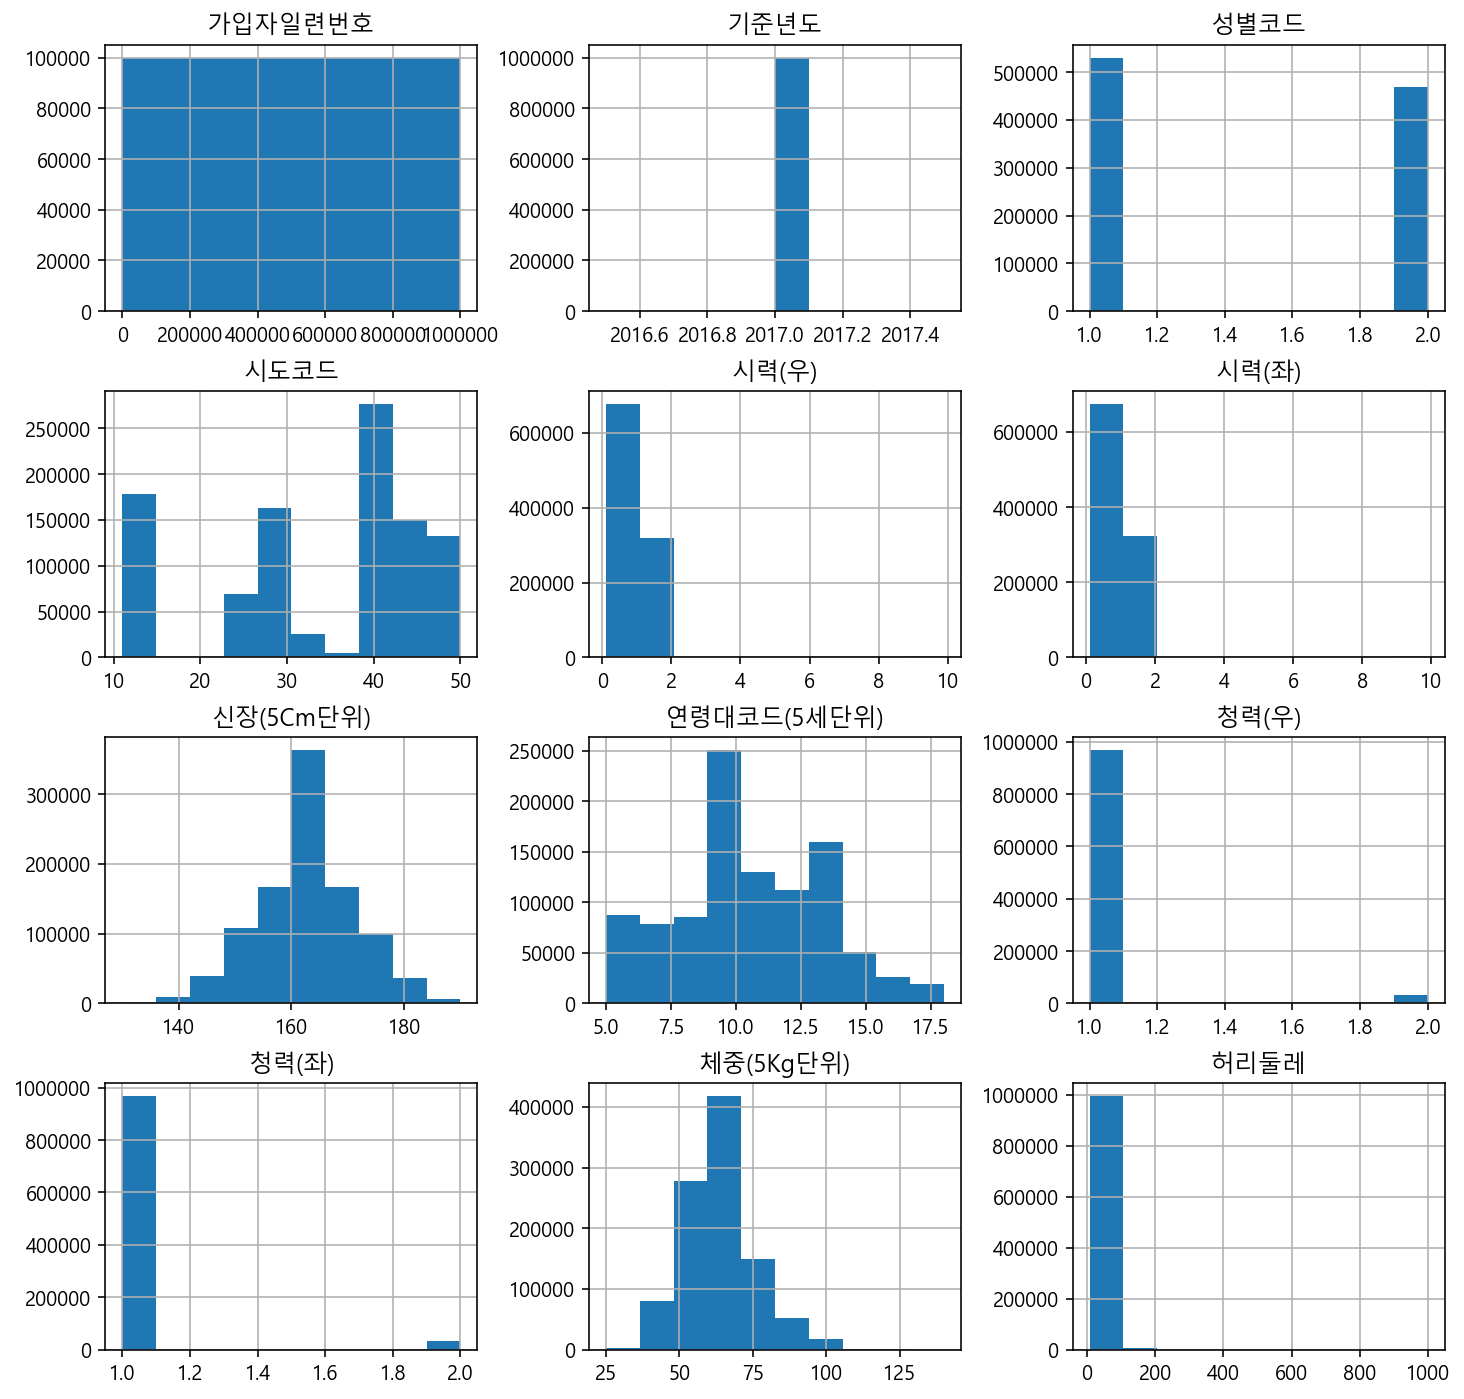

In [29]:
h = df.iloc[:,:12].hist(figsize=(12,12))
#시력 10은 실명인 경우 이상치로 줬다.

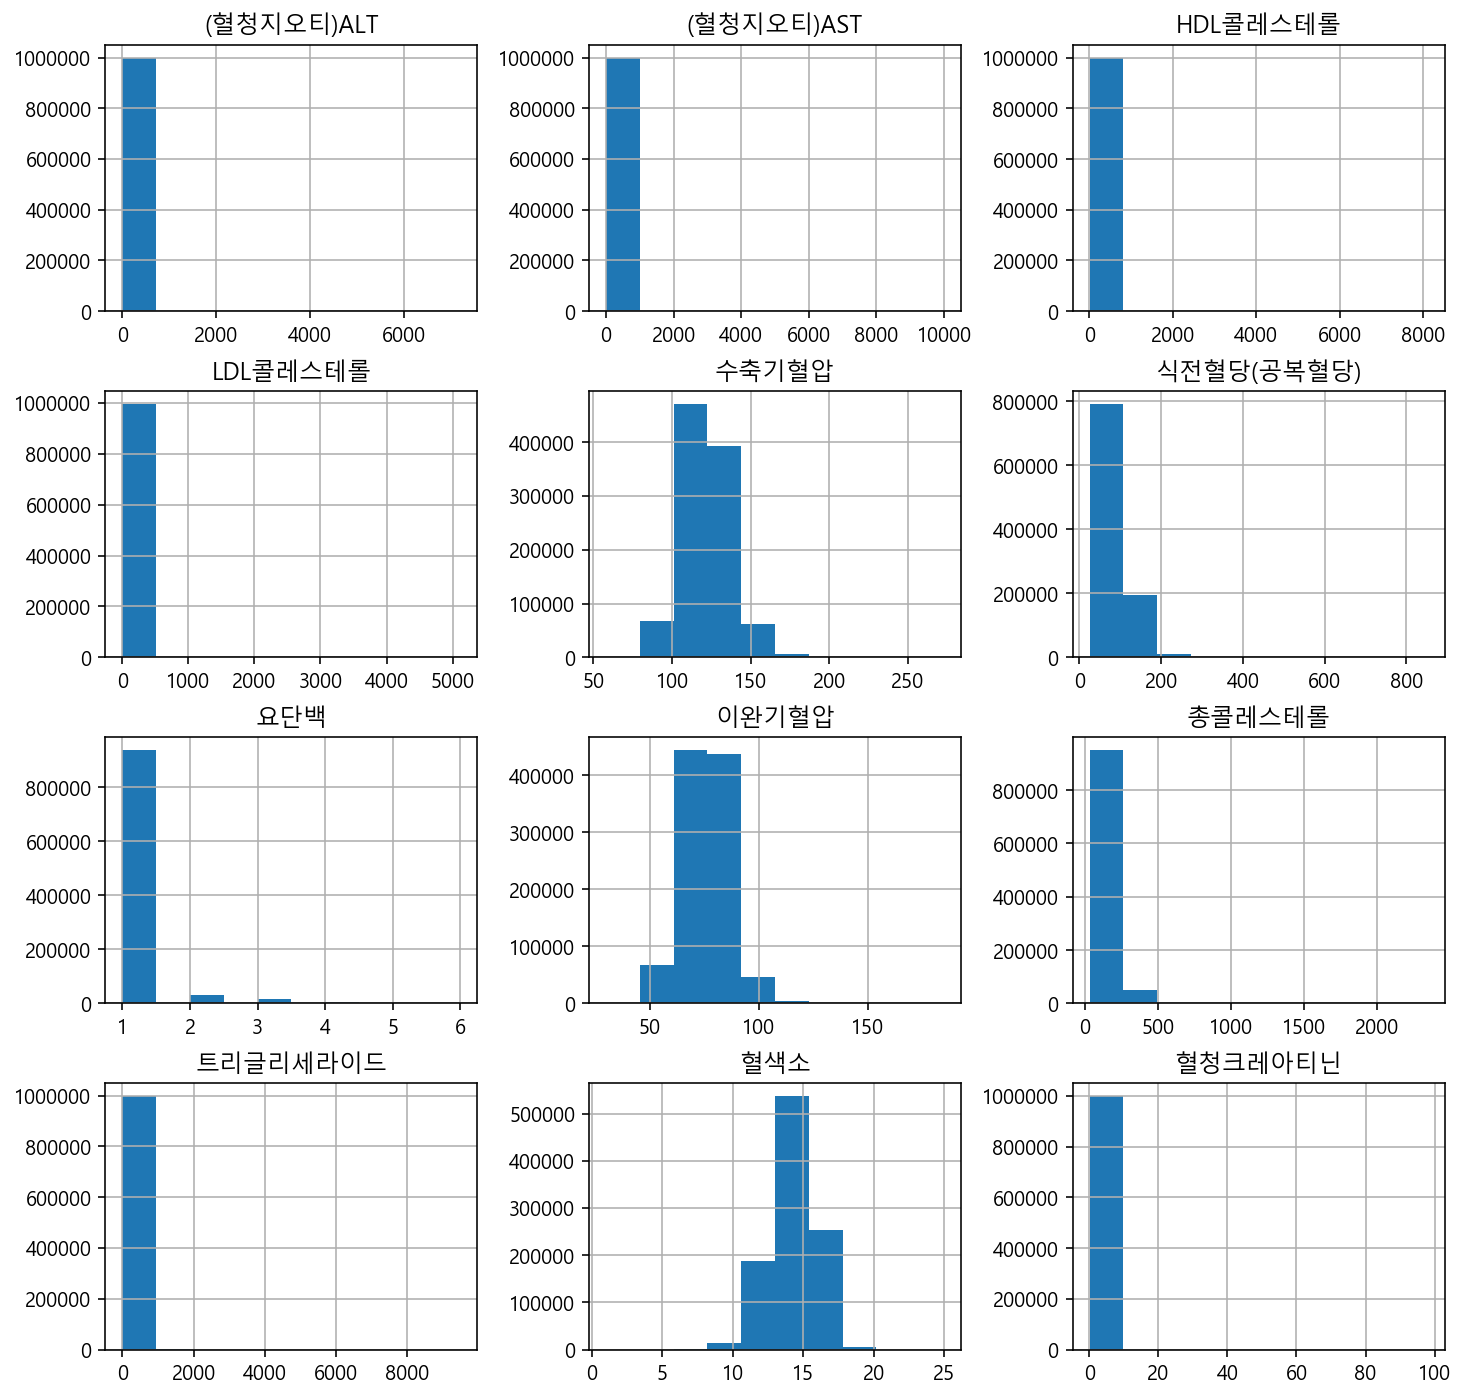

In [30]:
h =df.iloc[:,12:24].hist(figsize=(12,12))

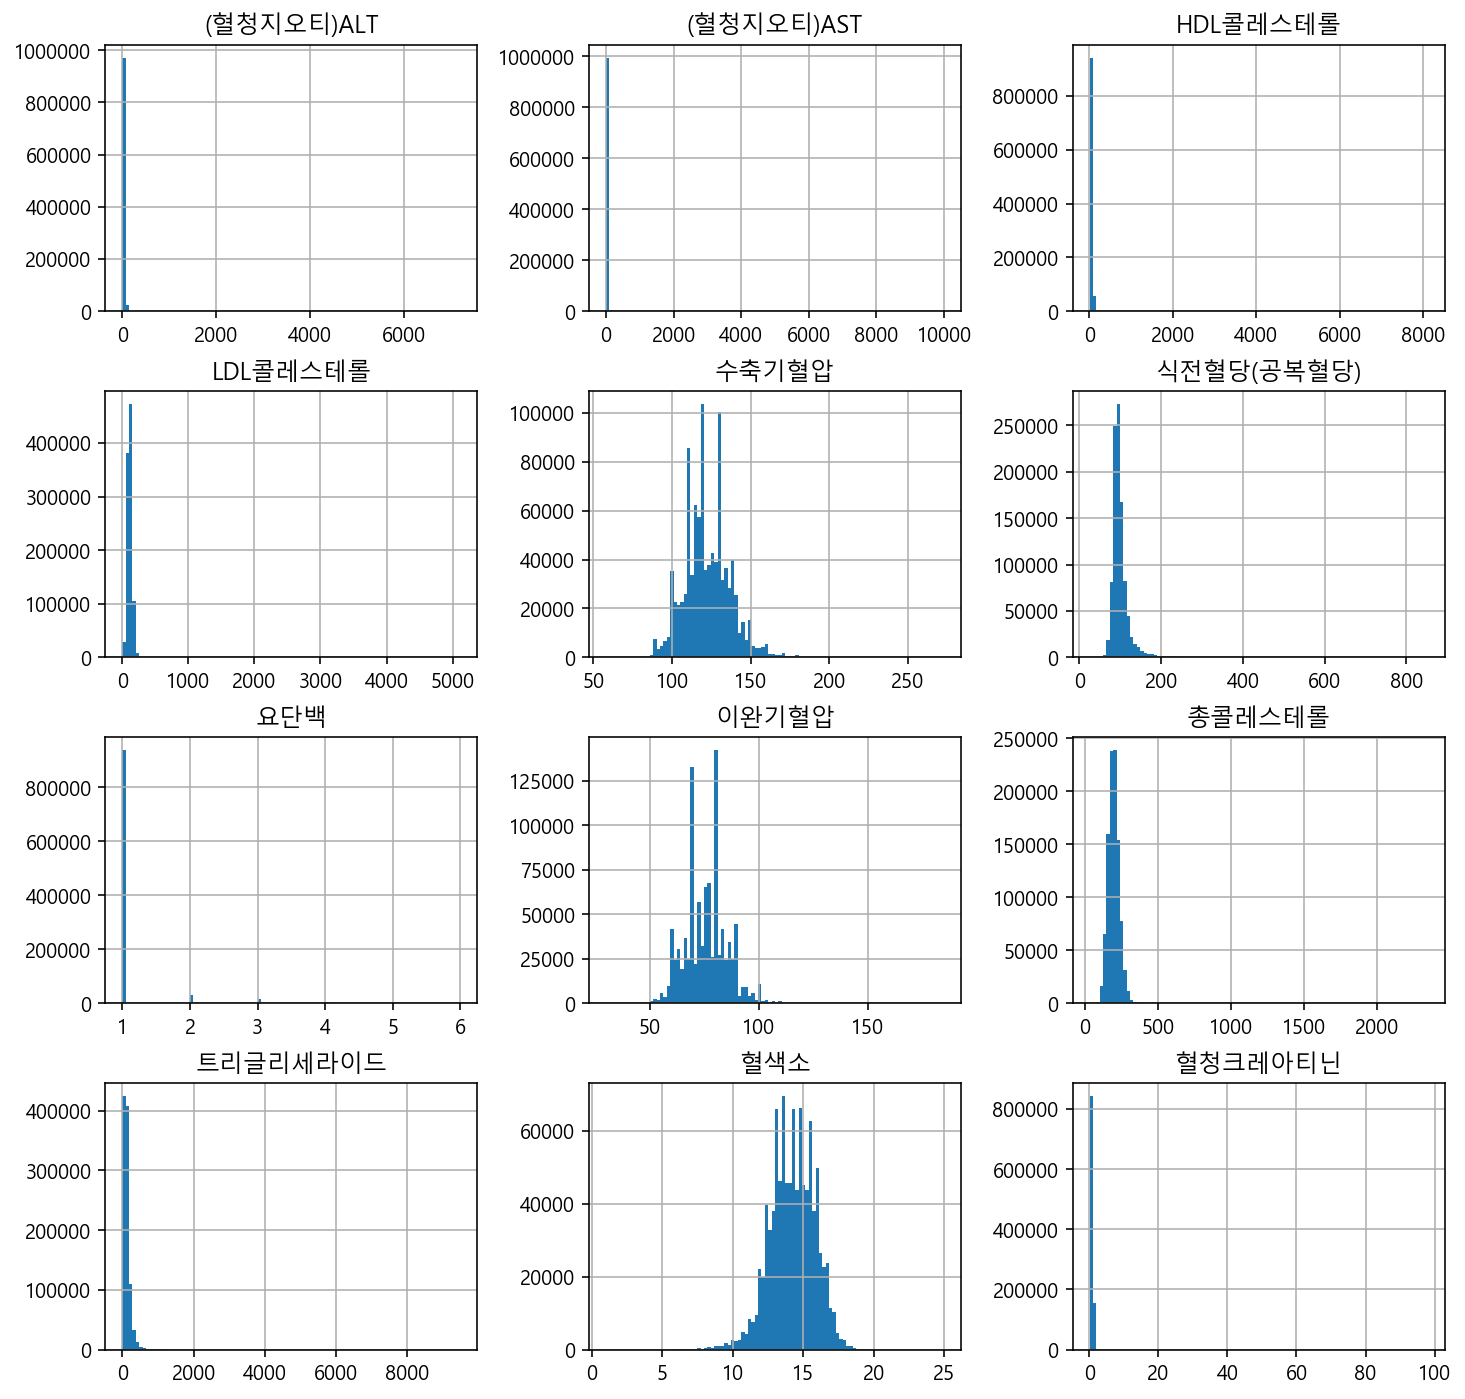

In [31]:
h =df.iloc[:,12:24].hist(figsize=(12,12),bins=100)
#bins막대기의 갯수 활씬 더 자세하게 그린다.

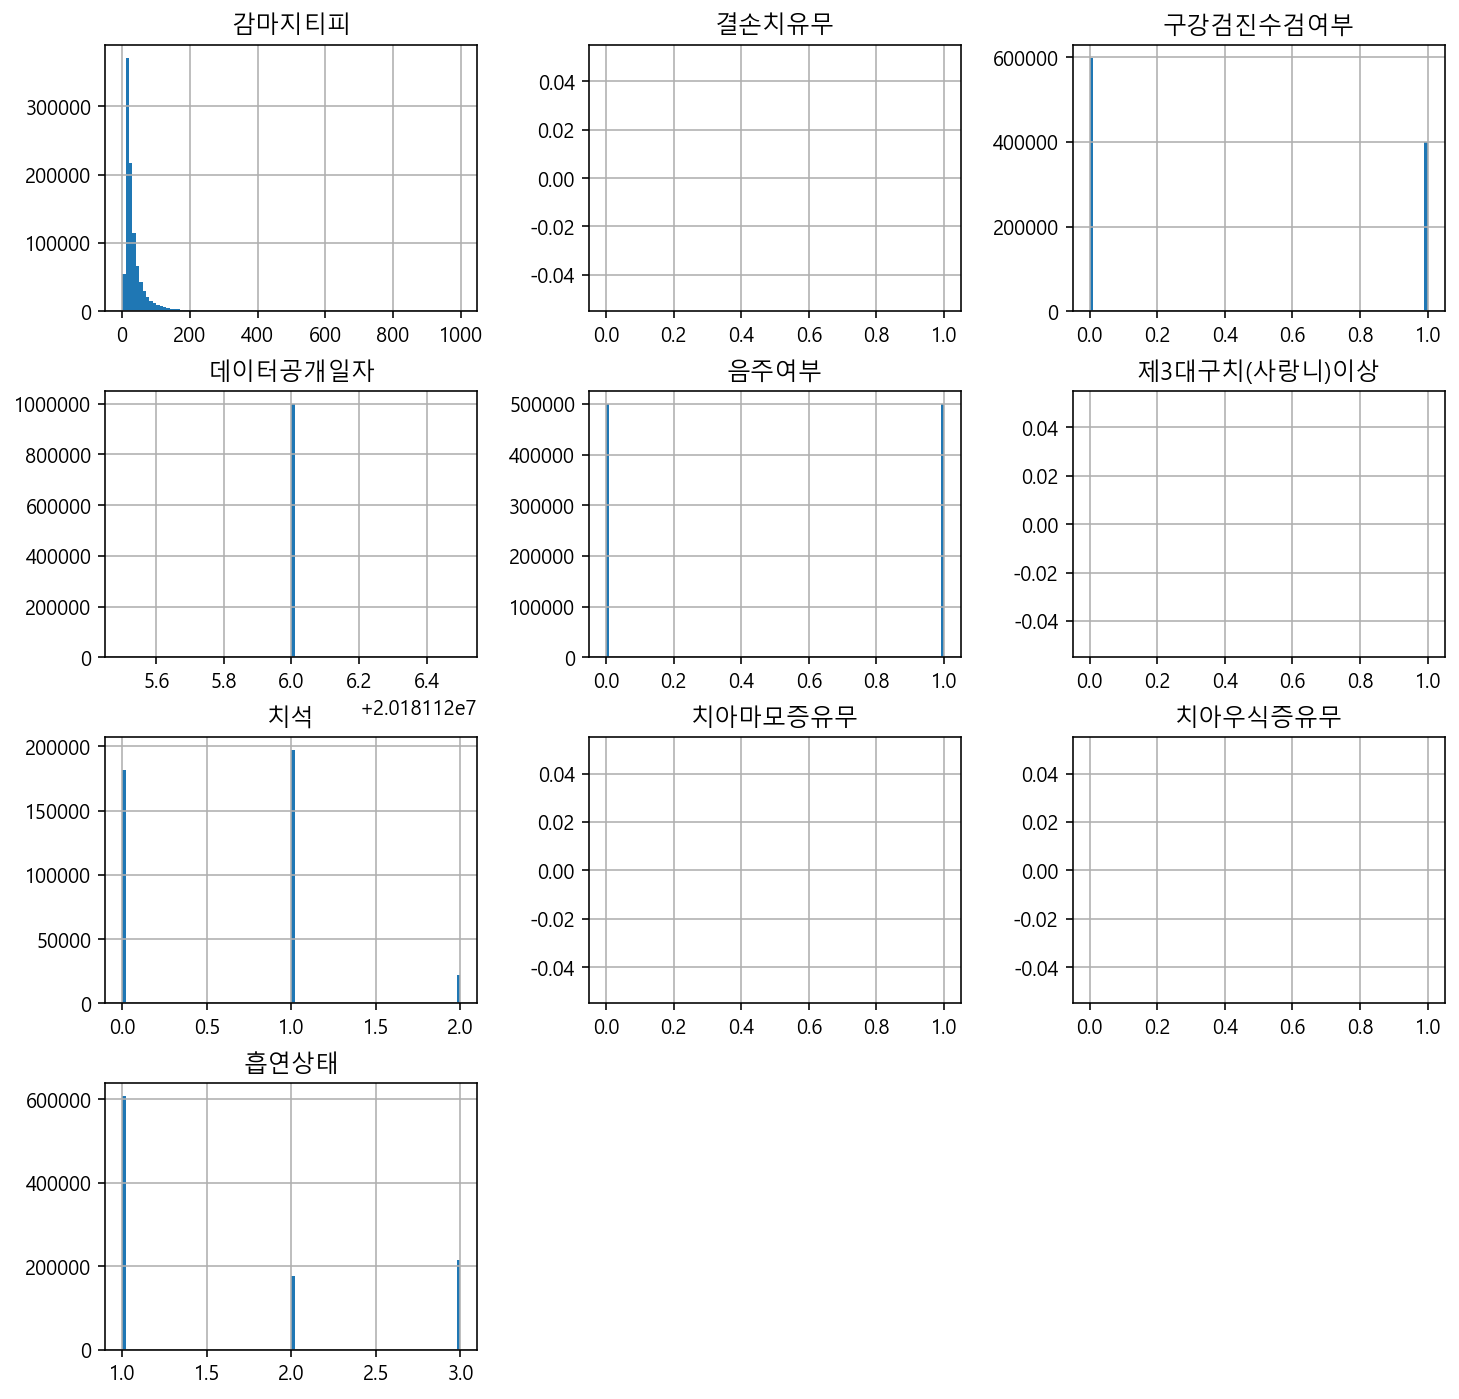

In [32]:
h = df.iloc[:,24:].hist(figsize=(12,12),bins =100)

## 12. 샘플데이터 추출하기
- 시간이 오래 걸리기 때문에 데이터의 샘플로 그려야 합니다. 1000개를 사용합니다.
- random_state=1을 사용하면 1,000,000개 중 랜덤으로 정해준 개수만큼 가져옵니다.



In [33]:
df_sample=df.sample(1000,random_state=1)
#randome_state=1 은 랜덤 값을 고정한다.
df_sample.shape

(1000, 34)

## 13.데이터 시각화 도구  Seaborn 사용하기

## 14. 범주형 (카테고리)데이터 시각화

- 문자와 같은 데이터
- countplot은 범부형 데이터의 수를 더한 값을 그래프로 표현합니다.
- value_counts로 구한 값을 시각화 한다고 보면 됩니다.

### 14.1 countplot - 음주여부

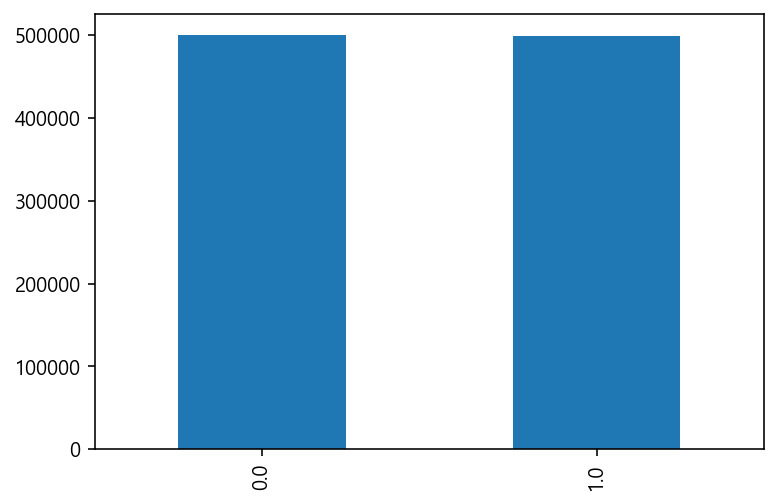

In [34]:
df["음주여부"].value_counts().plot.bar()

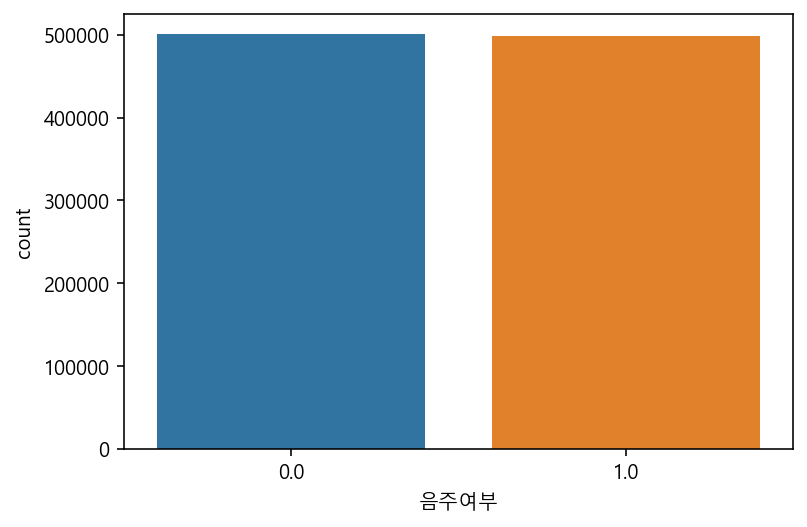

In [35]:
sns.countplot(x="음주여부",data=df)

## 14.2 hue 옵션 사용하기

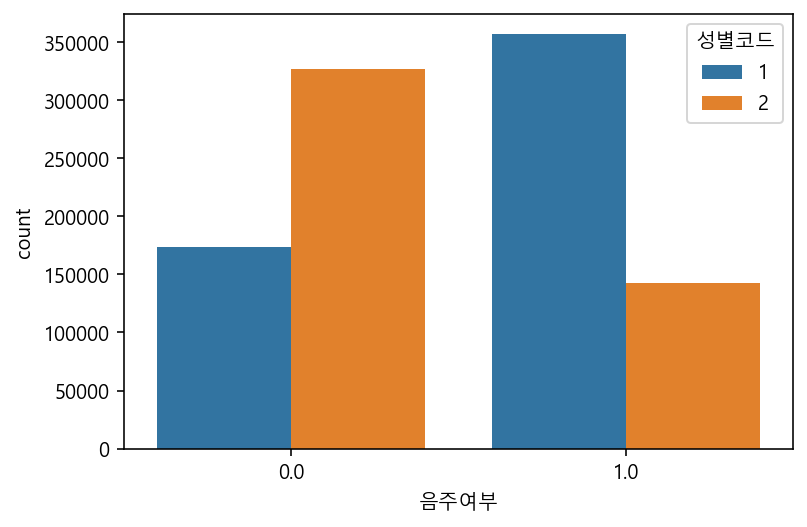

In [36]:
#sns.set(font_scale=1.5, font="AppleGothic") 
#으로 seaborn에서 옵션 값들이 적용하여 사용할 수 있습니다.


sns.countplot(data=df,x="음주여부",hue="성별코드")
#성별1 남자 성별0 여자

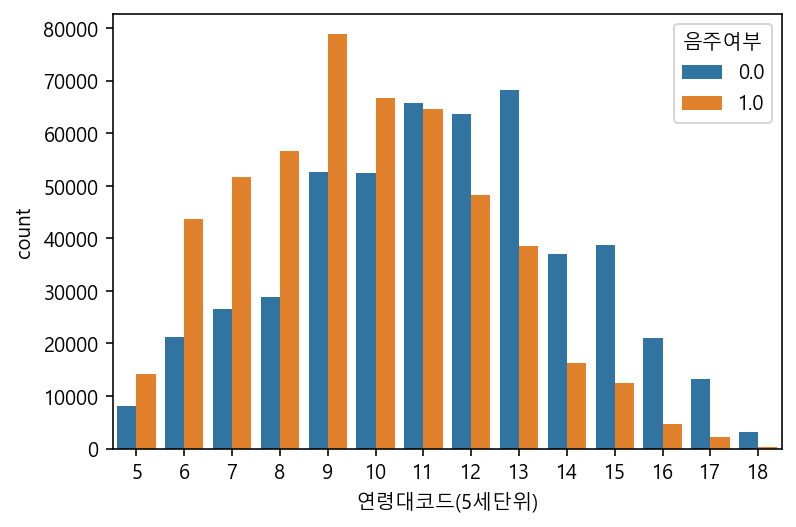

In [37]:
sns.countplot(data=df,x="연령대코드(5세단위)",hue="음주여부")

### 14.3 countplot - 키와 몸무게

- 키와 몸무게는 연속형 데이터라고 볼 수 있습니다.
- 하지만 이 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있습니다.
- 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있습니다.

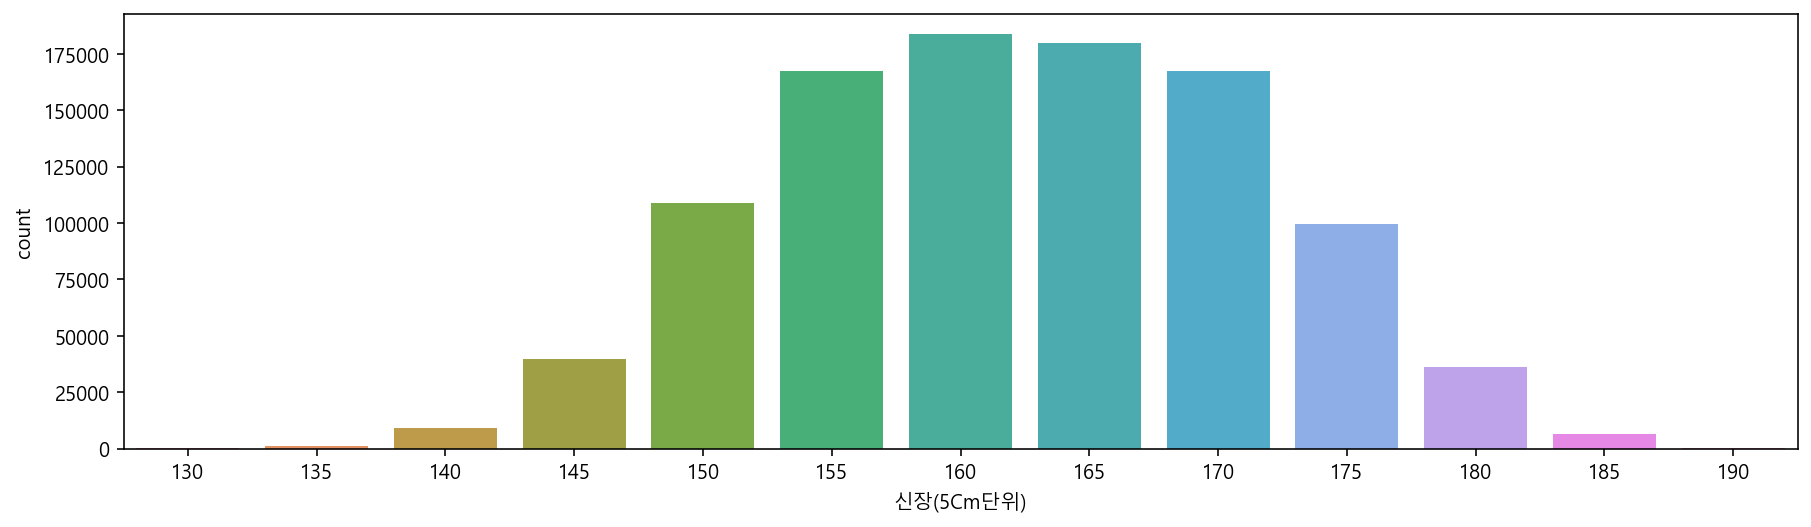

In [38]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x="신장(5Cm단위)")

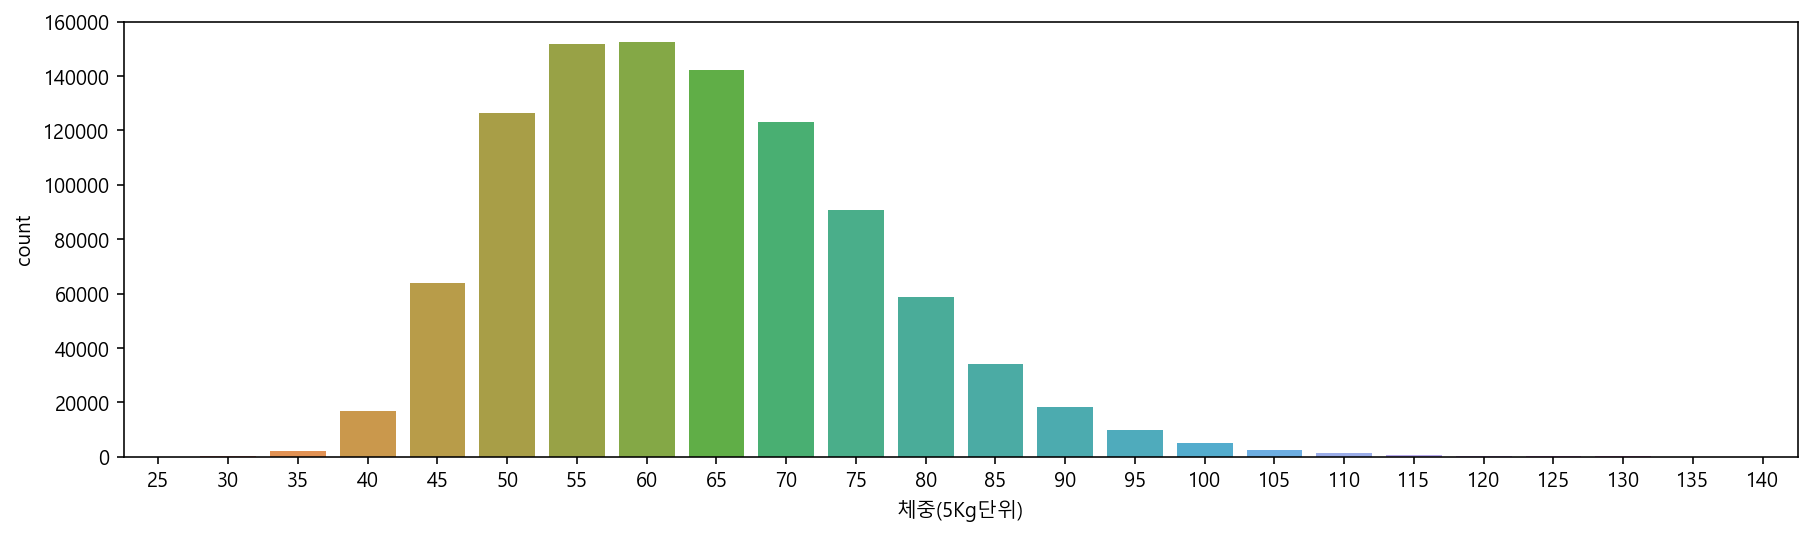

In [39]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x="체중(5Kg단위)")

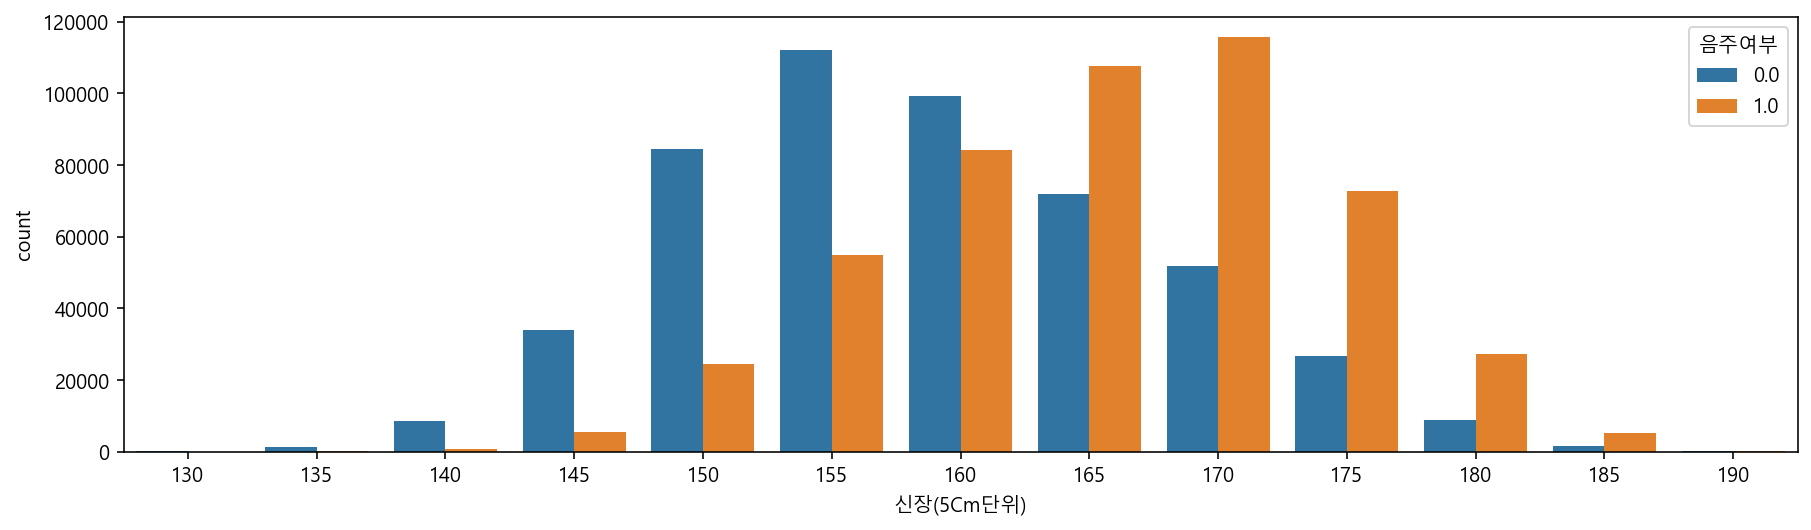

In [40]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x="신장(5Cm단위)",hue="음주여부")

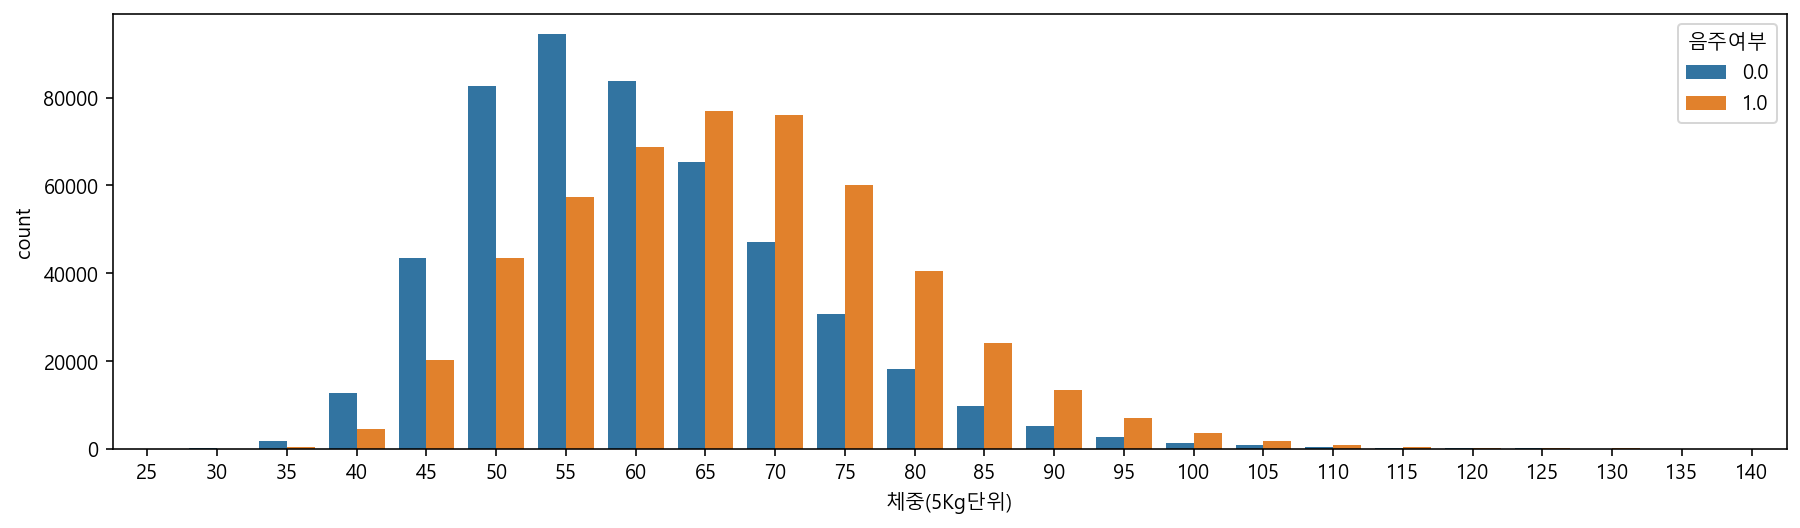

In [41]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,x="체중(5Kg단위)",hue="음주여부")

### 14.4 barplot- 수치형 vs 범부형 데이터 시각화

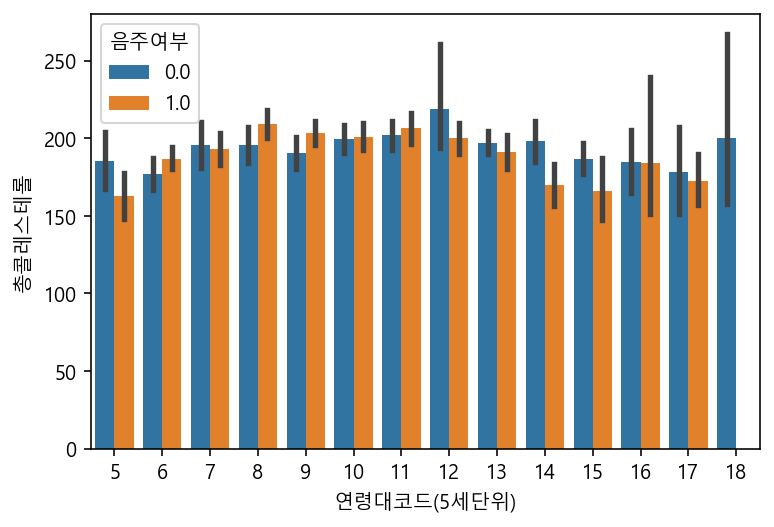

In [42]:
#sns.barplot(data=df,x="연령대코드(5세단위)",y="총콜레스테롤")
#연령별 총콜레스테롤 평균치를 구해준다,
sns.barplot(data=df_sample,x="연령대코드(5세단위)",y="총콜레스테롤",hue="음주여부")

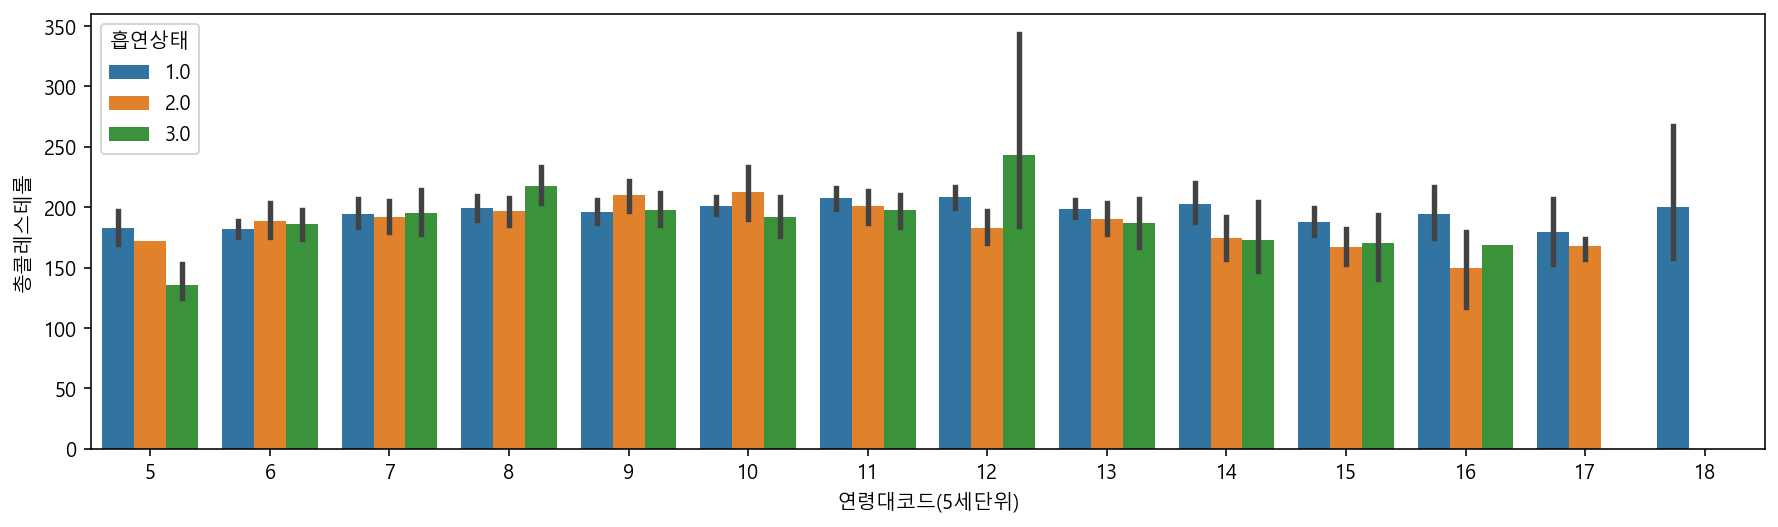

In [43]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample,x="연령대코드(5세단위)",y="총콜레스테롤",hue="흡연상태")

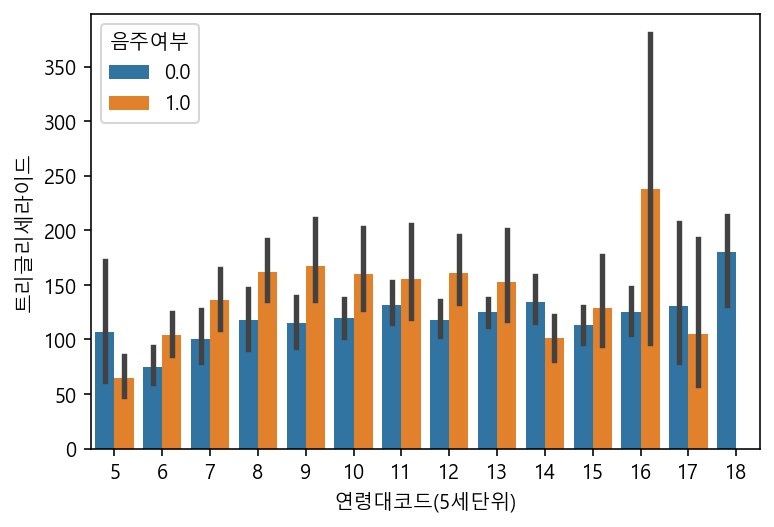

In [44]:
#트리글리세라이드(중성지방)에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그립니다.
sns.barplot(data=df_sample,x="연령대코드(5세단위)",y="트리글리세라이드",hue="음주여부")
#검은색은 신뢰구간 ci=95% 즉 95%의 신뢰구간

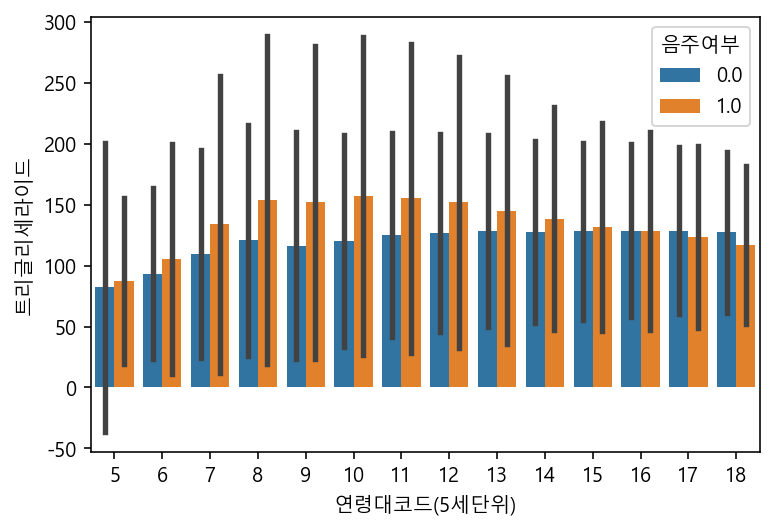

In [45]:
sns.barplot(data=df,x="연령대코드(5세단위)",y="트리글리세라이드",hue="음주여부",ci="sd")
#ci="sd" 편차가 크다.

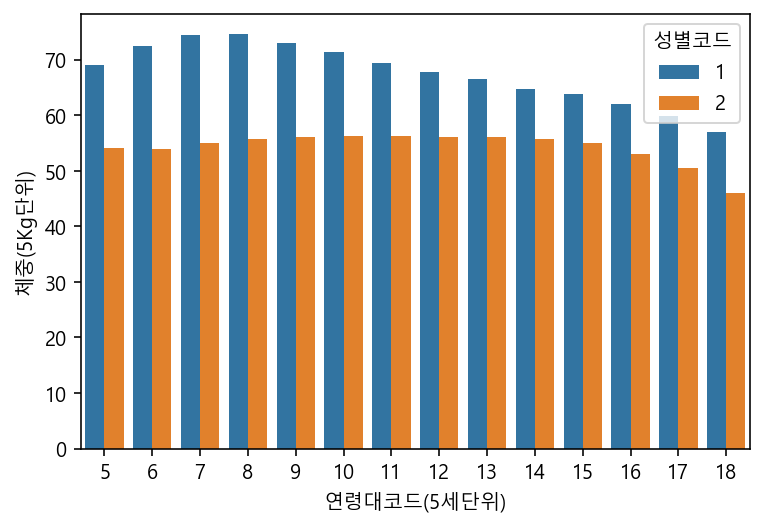

In [46]:
sns.barplot(data=df,x="연령대코드(5세단위)",y="체중(5Kg단위)",hue="성별코드",ci=None)
#대체로 남자가 여자보다 몸무게가 무겁다.

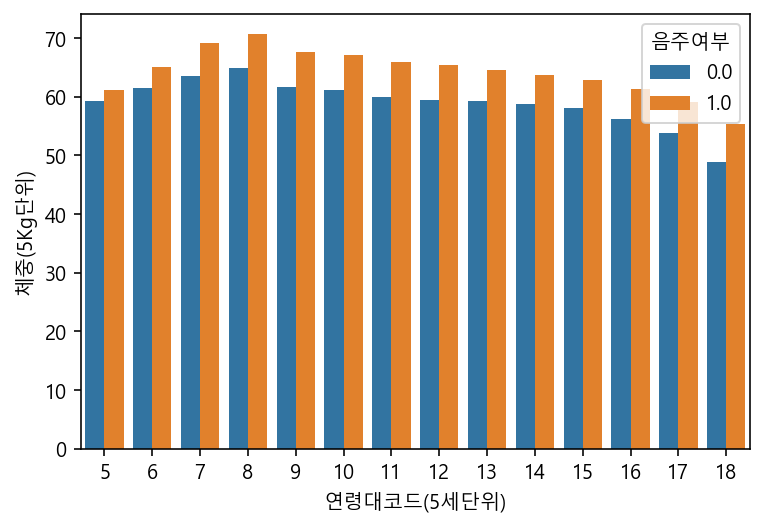

In [47]:
sns.barplot(data=df,x="연령대코드(5세단위)",y="체중(5Kg단위)",hue="음주여부",ci=None)

### 14.5 lineplot and pointplot

- 주식이나 부동산 재고량 같은 수치를 나타낼때 line point를 많이 사용한다.

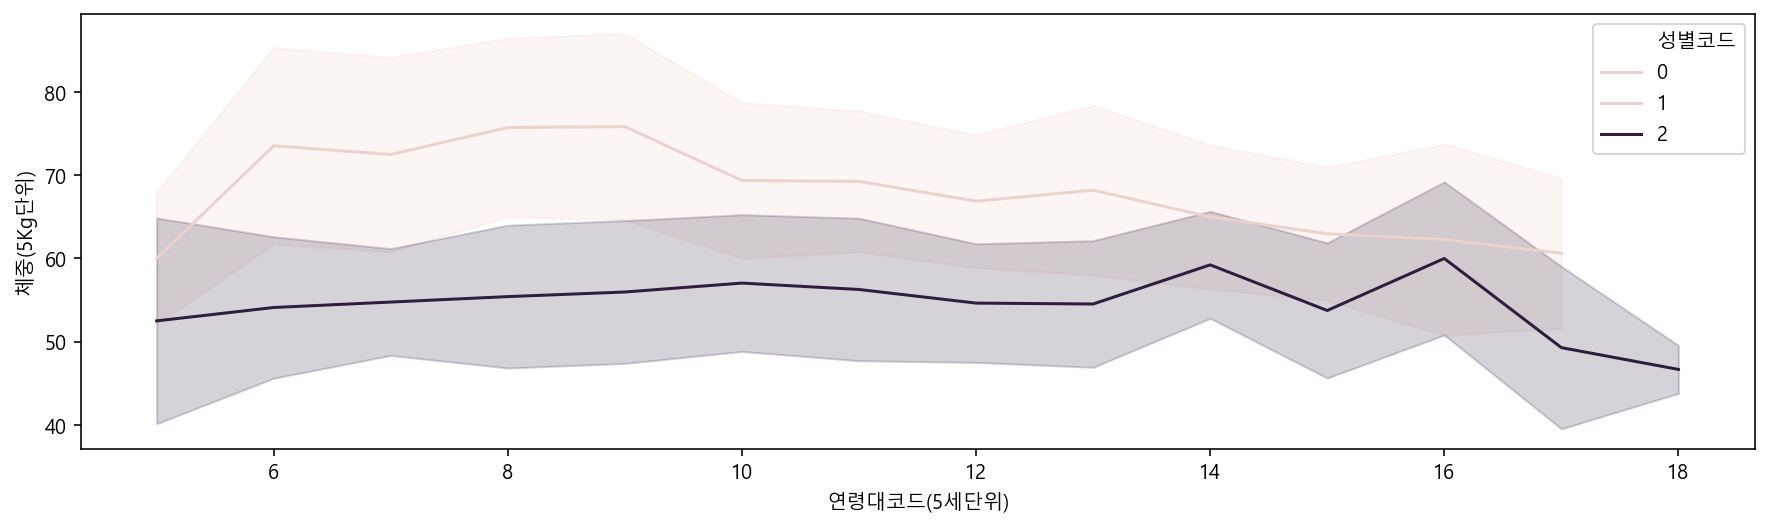

In [48]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample,x="연령대코드(5세단위)",y="체중(5Kg단위)",hue="성별코드",ci="sd")

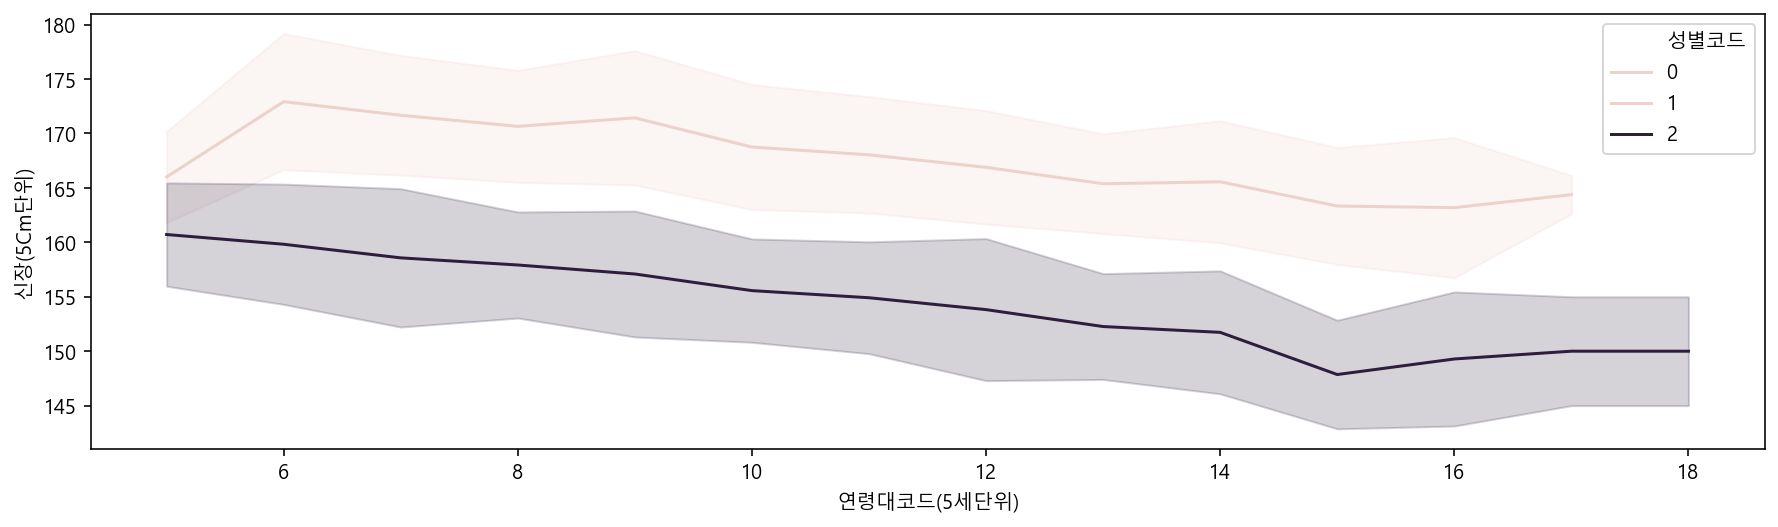

In [49]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample,x="연령대코드(5세단위)",y="신장(5Cm단위)",hue="성별코드",ci="sd")

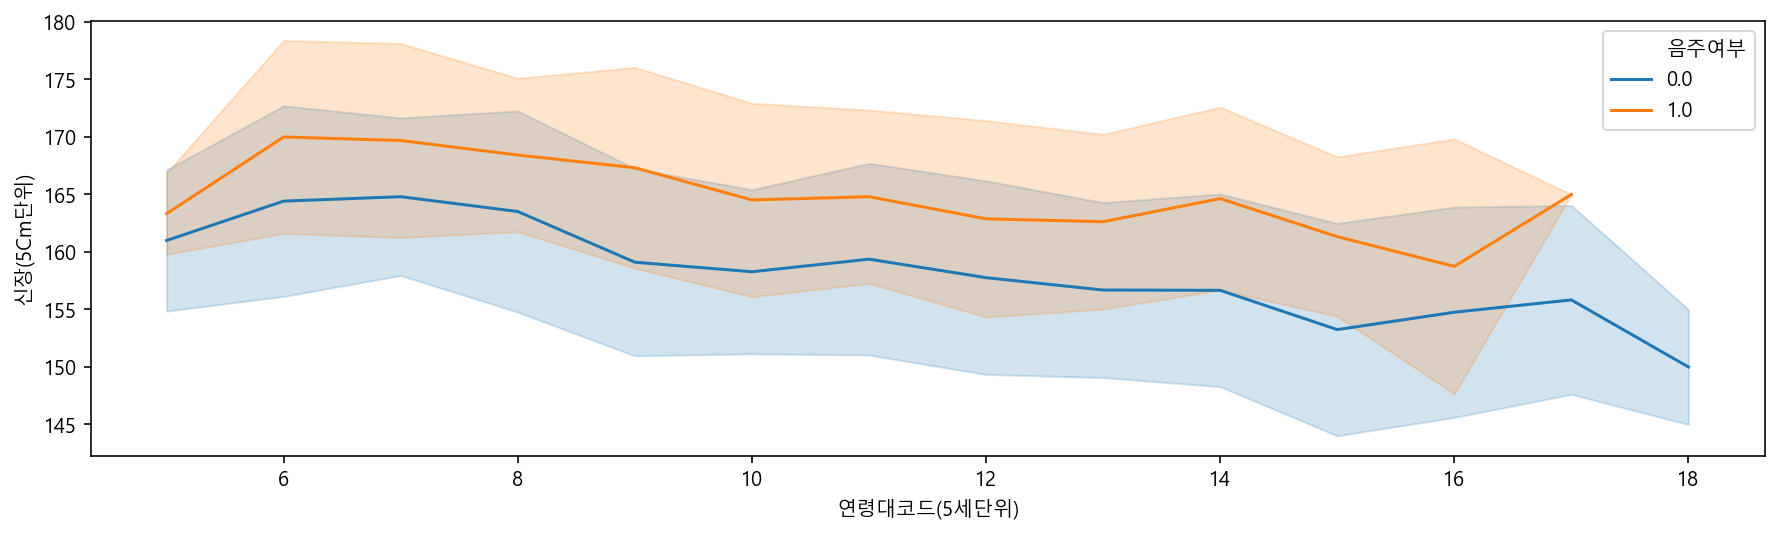

In [50]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample,x="연령대코드(5세단위)",y="신장(5Cm단위)",hue="음주여부",ci="sd")

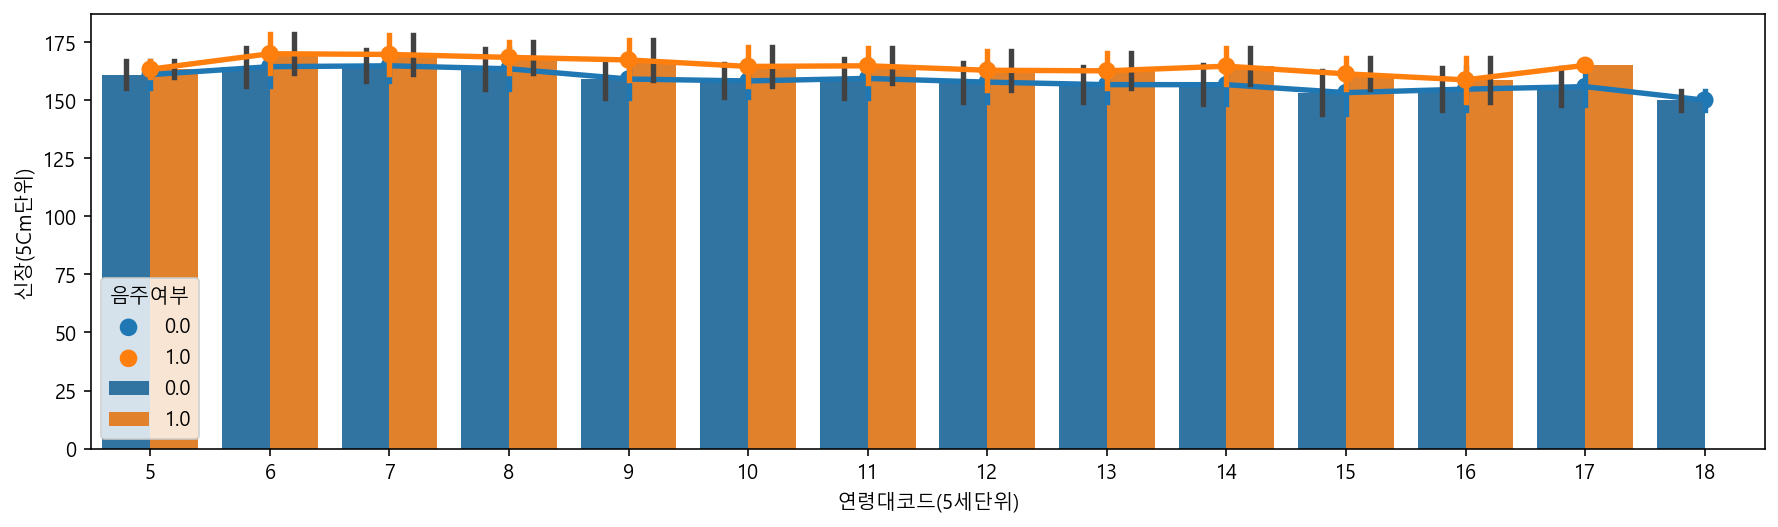

In [51]:
#point,bar겹쳐서 그리기
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample,x="연령대코드(5세단위)",y="신장(5Cm단위)",hue="음주여부",ci="sd")
sns.pointplot(data=df_sample,x="연령대코드(5세단위)",y="신장(5Cm단위)",hue="음주여부",ci="sd")

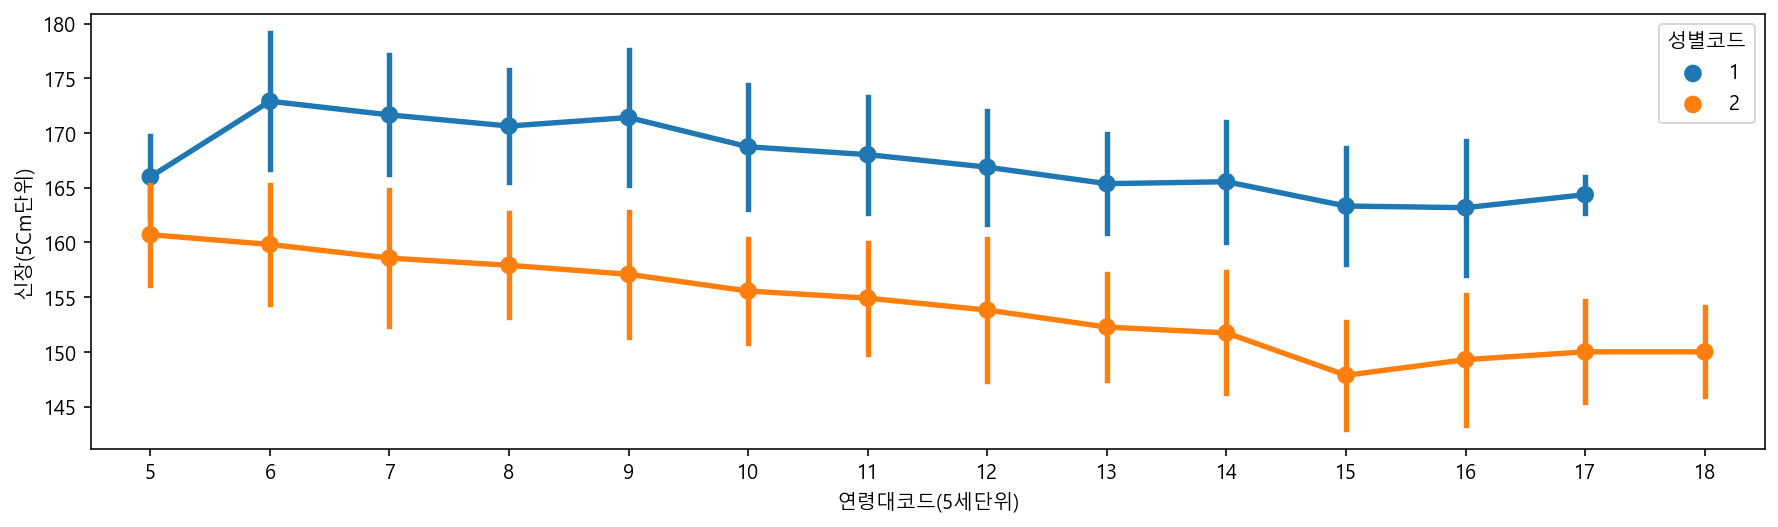

In [52]:
plt.figure(figsize=(15,4))

sns.pointplot(data=df_sample,x="연령대코드(5세단위)",y="신장(5Cm단위)",hue="성별코드",ci="sd")

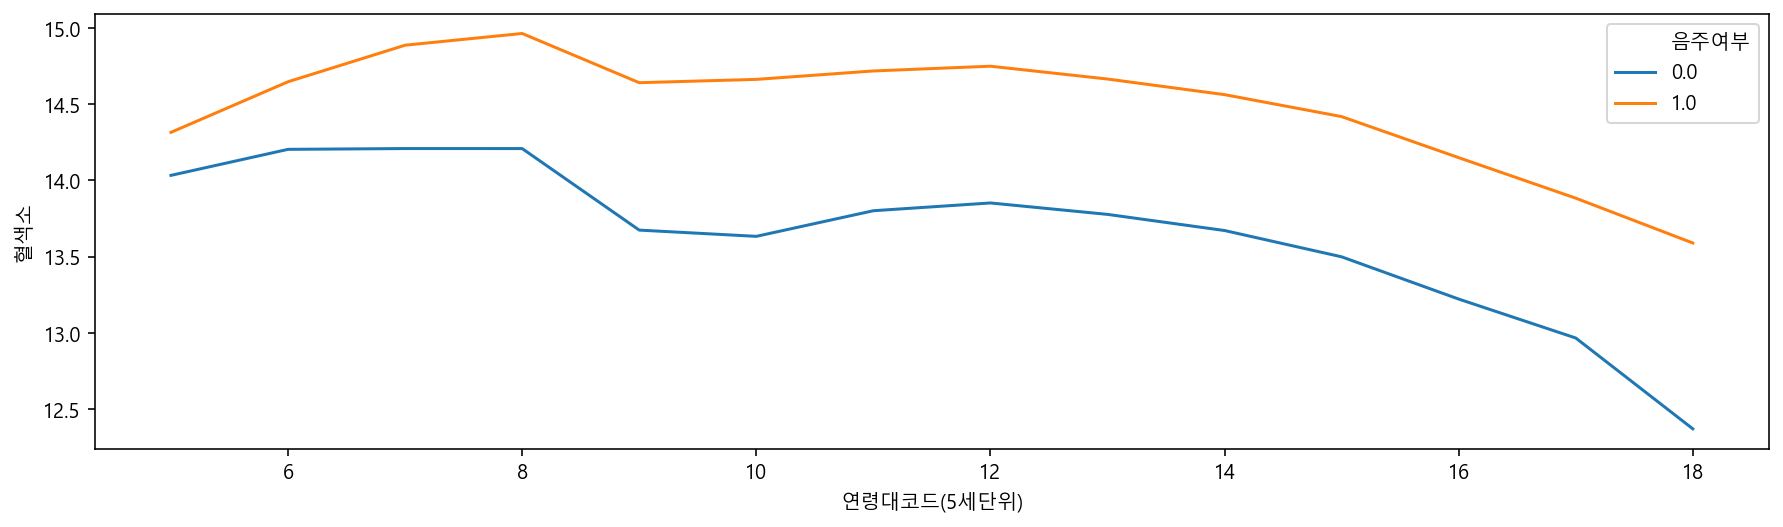

In [53]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df,x="연령대코드(5세단위)",y="혈색소",hue="음주여부",ci=None)

### 14.6 boxplot

- boxplot은 박스와 수염이 있는 모양이어서 box and whisker plot으로도 불립니다. 특정 column 값들을 boxplot으로 그릴 수 있습니다.

- 박스의 밑은 1사분위수, 중간은 2사분위수, 위는 3사분위수입니다.

- 사용법은 다른 그래프들과 비슷합니다.

    1. 최솟값
    2. 제 1사분위수, 25%
    3. 제 2사분위수(),즉 중앙값
    4. 제 3사준위수(), 75%
    5. 최댓값
    6. Box plot 이해하기

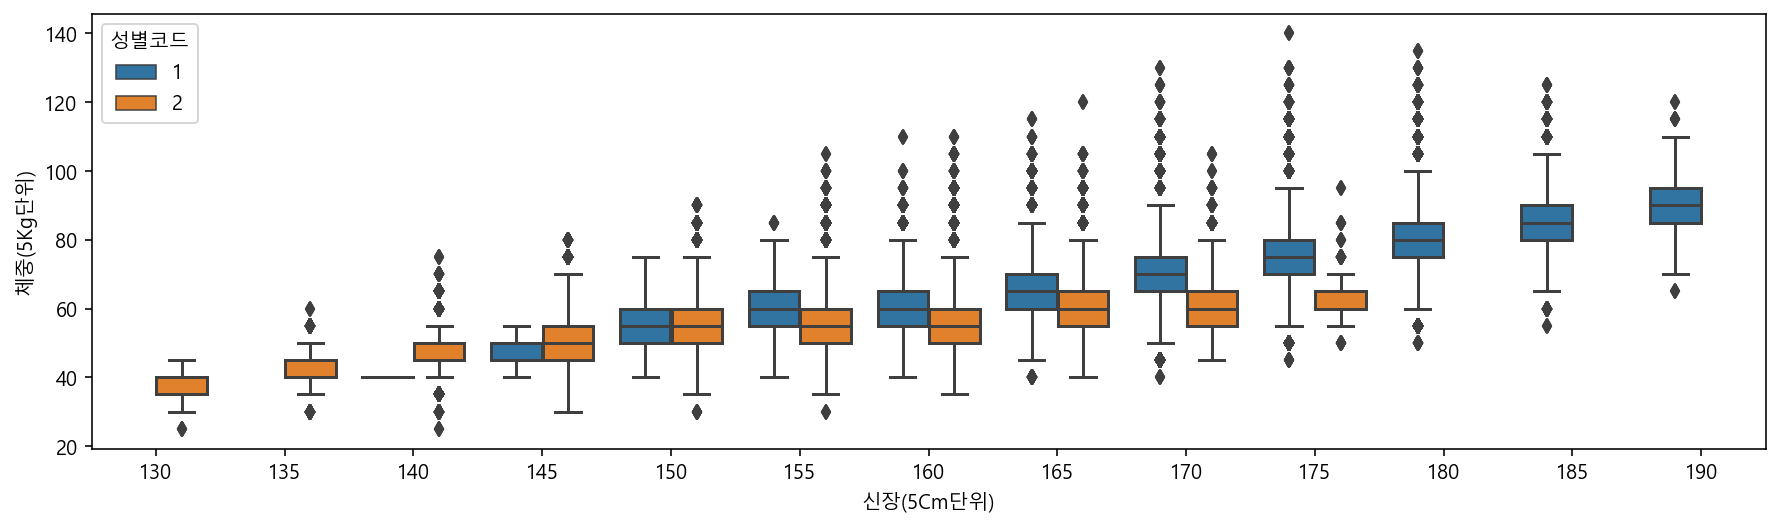

In [54]:
# boxoplot으로 신장에 따른 체중을 그리며 성별코드에 따라 다른 색상으로 표현
plt.figure(figsize=(15,4))
sns.boxplot(data=df,x="신장(5Cm단위)",y="체중(5Kg단위)",hue="성별코드")

### 14.7 violinplot

- boxplot을 좀더 세세하게 보여준다.

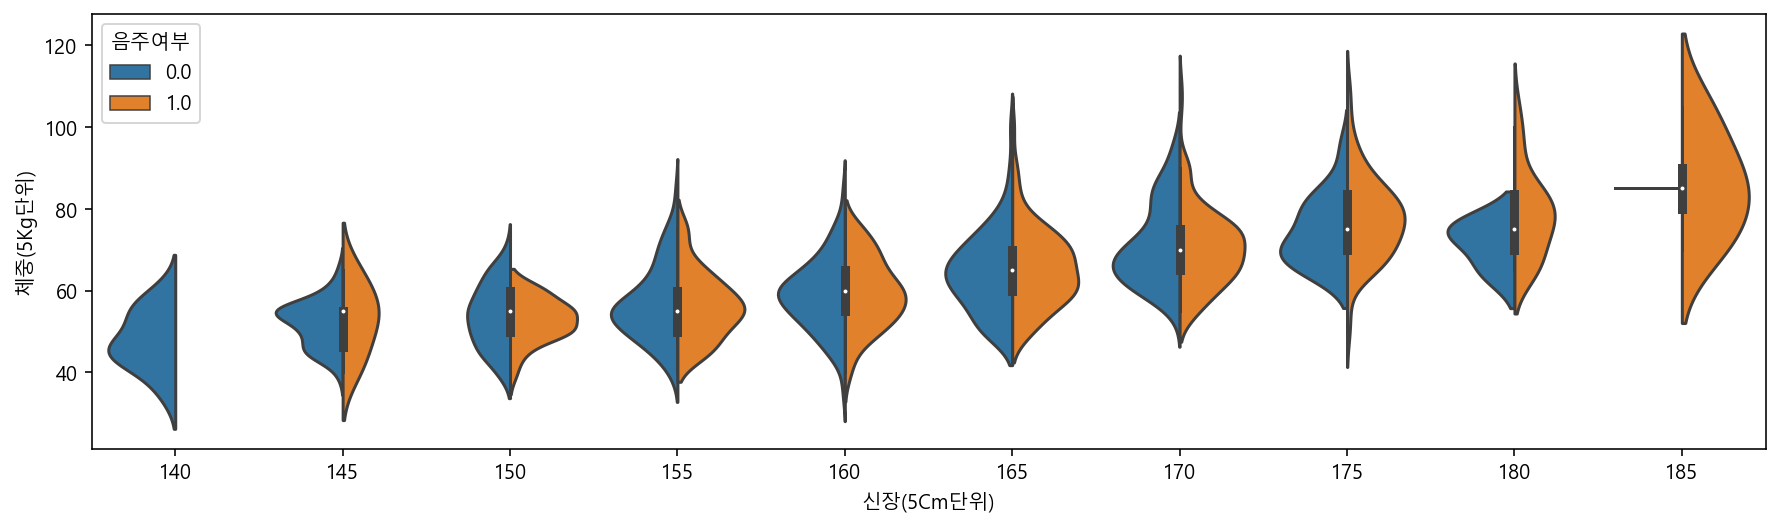

In [55]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample,x="신장(5Cm단위)",y="체중(5Kg단위)",hue="음주여부",split=True)
#split는 두개의 그래프를 한곳에 같이 그린다.

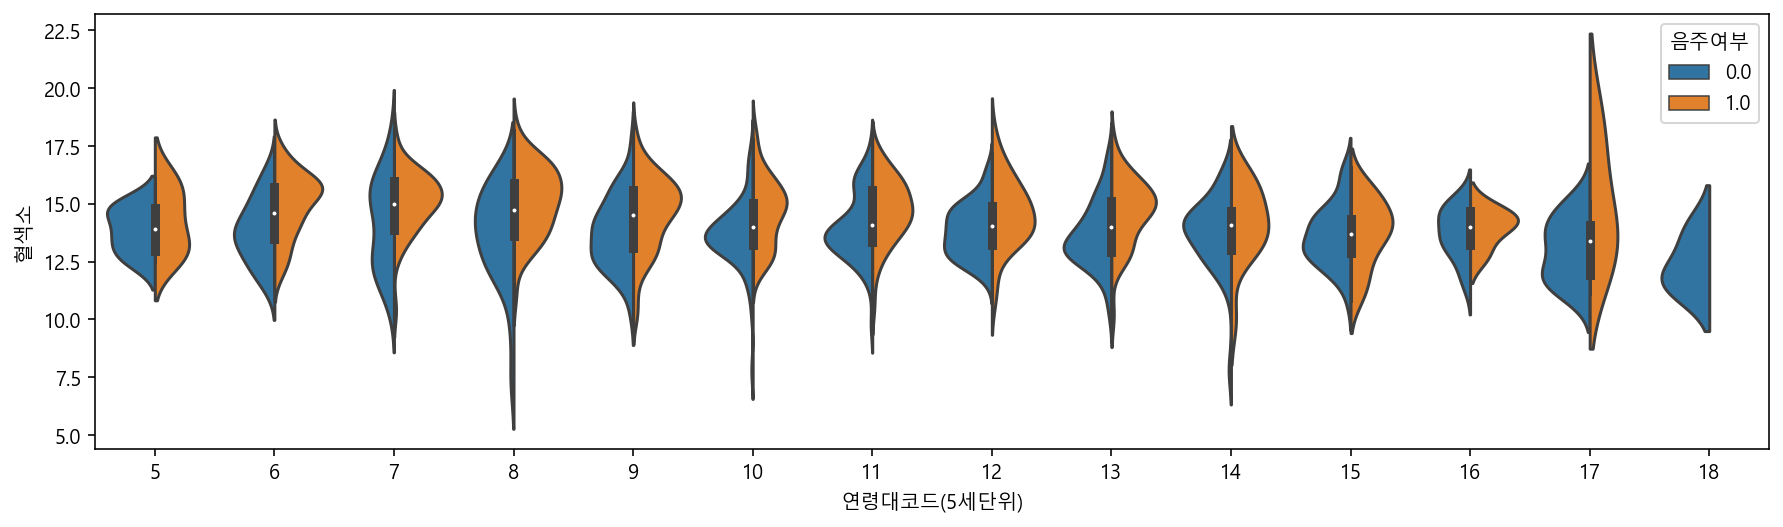

In [56]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample,x="연령대코드(5세단위)",y="혈색소",hue="음주여부",split=True)

### 14.8 swarm plot
- 범주형 데이터를 산점도로 시각화하고자 할 때 상용한다.

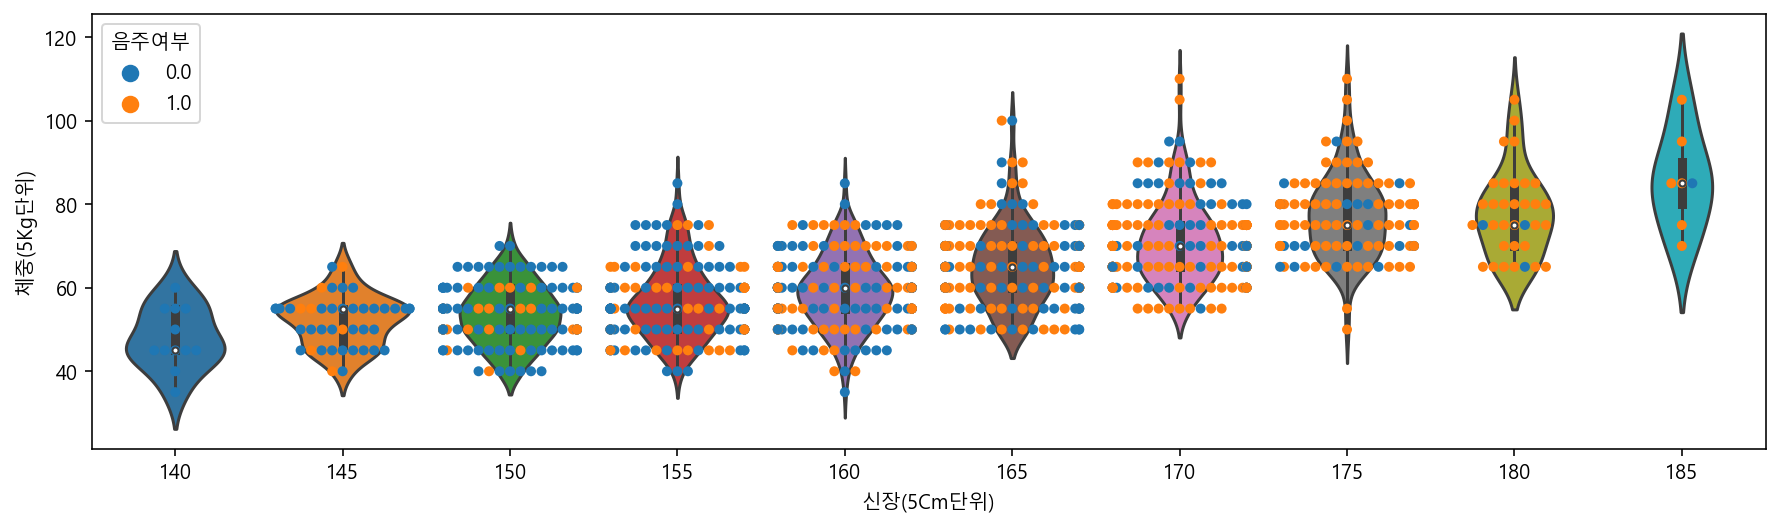

In [57]:
# 신장에 따른 체중을 그리며 음주여부에 따라 다른 색상으로 표현
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample,x="신장(5Cm단위)",y="체중(5Kg단위)",hue="음주여부")
sns.violinplot(data=df_sample,x="신장(5Cm단위)",y="체중(5Kg단위)")
#split는 두개의 그래프를 한곳에 같이 그린다.

C:\Users\wjd48_000\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\wjd48_000\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


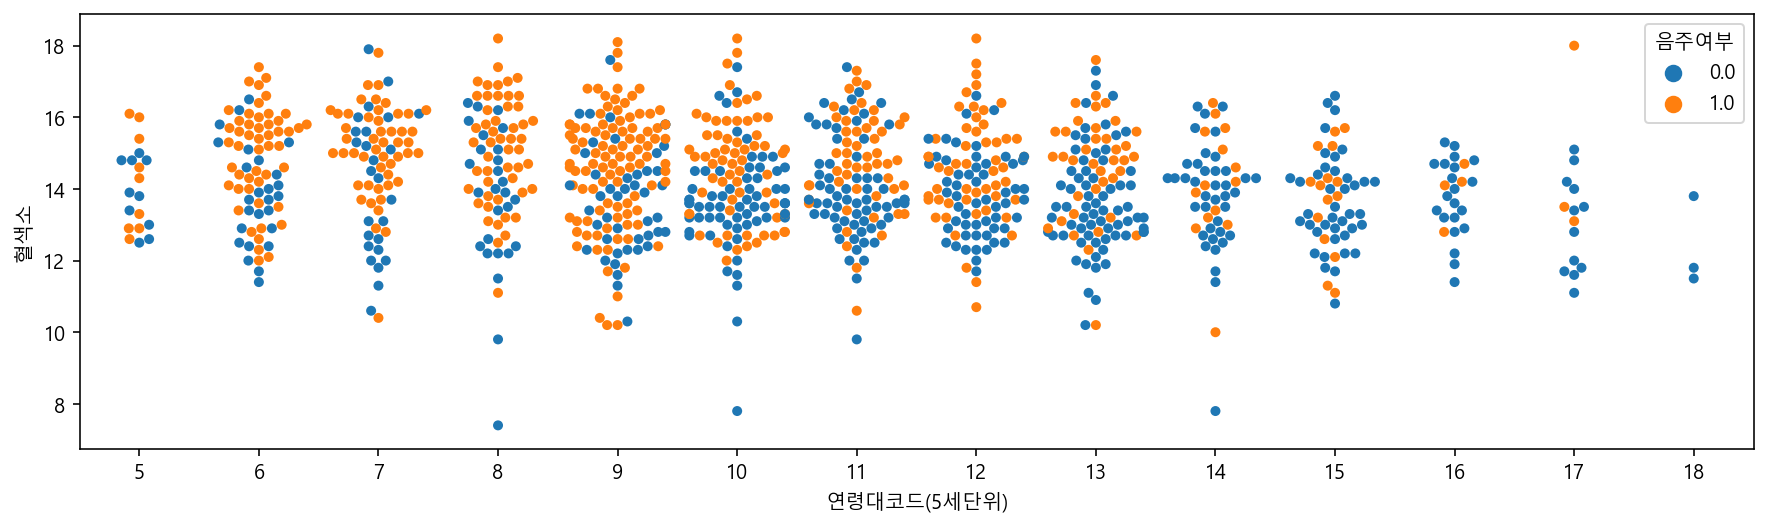

In [58]:
#연령대코드(5세단위)에 따른 음주여부
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample,x="연령대코드(5세단위)",y="혈색소",hue="음주여부")

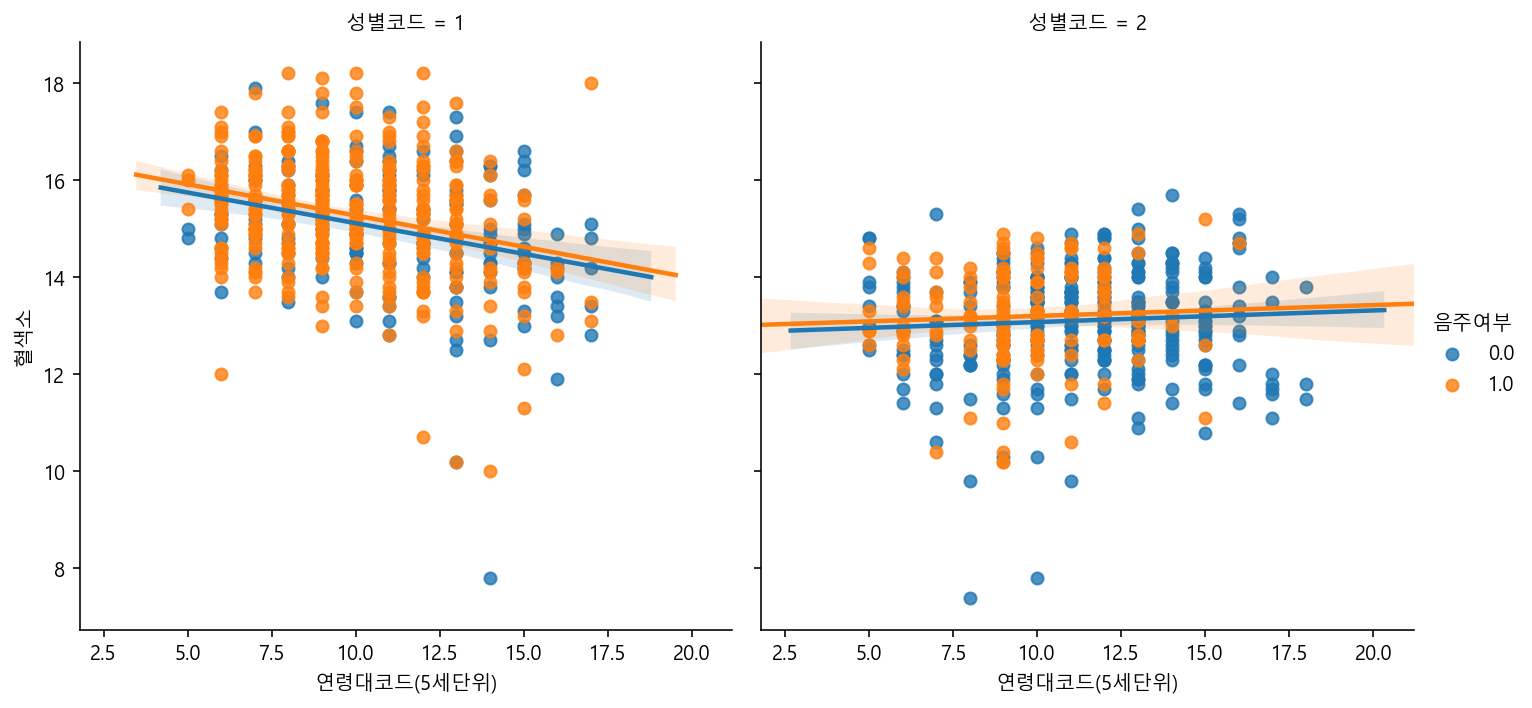

In [59]:
#lmplot으로 그리기
#선은 회귀선
#col을 활용해서 컬럼별로 나타낼 수 있다.
sns.lmplot(data=df_sample,x="연령대코드(5세단위)",y="혈색소",hue="음주여부",col="성별코드")

## 15. 수치형 데이터 시각화

### 15.1 scatterplot - 산점도
- 수치형vs 수치형 데이터의 *상관관계*를 볼 때 주로 사용합니다.
- 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있습니다.

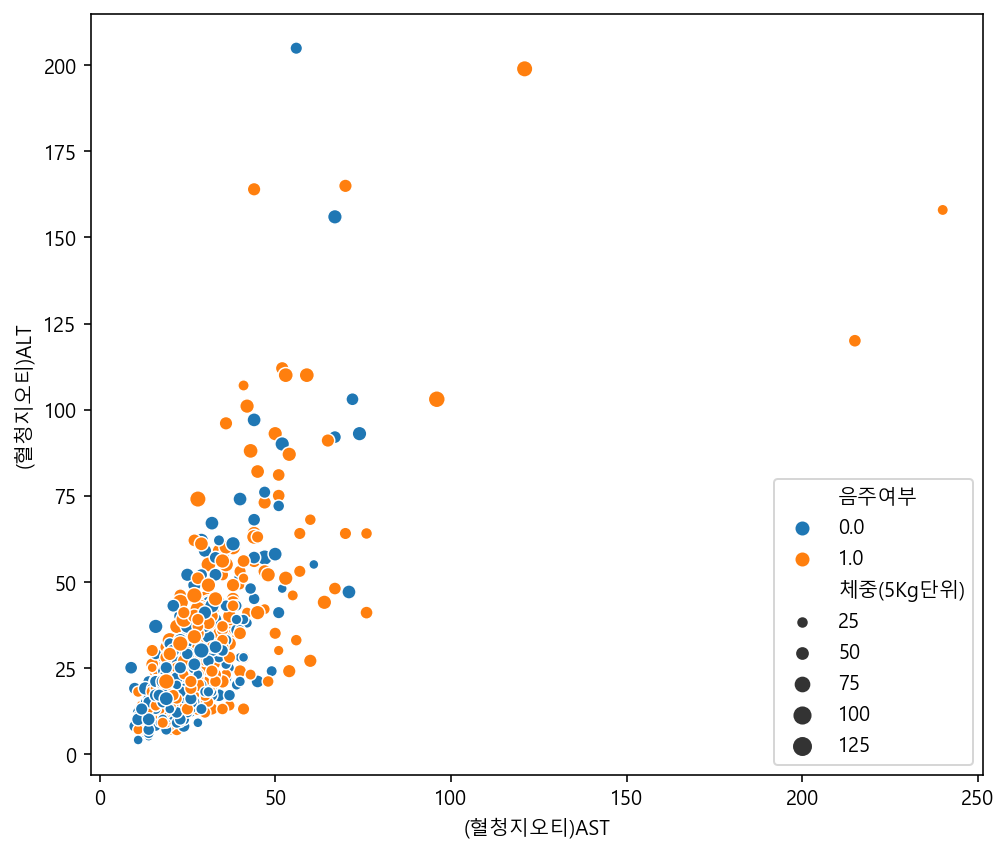

In [60]:
#hue에 연속형 데이터도 넣어도 된다.
plt.figure(figsize=(8,7))
sns.scatterplot(data=df_sample,x="(혈청지오티)AST",y="(혈청지오티)ALT",hue="음주여부",
               size="체중(5Kg단위)")

### 15.2 lmplot - 상관관계 보기
- subplot을 그릴수 있다.가 큰 장점이다.

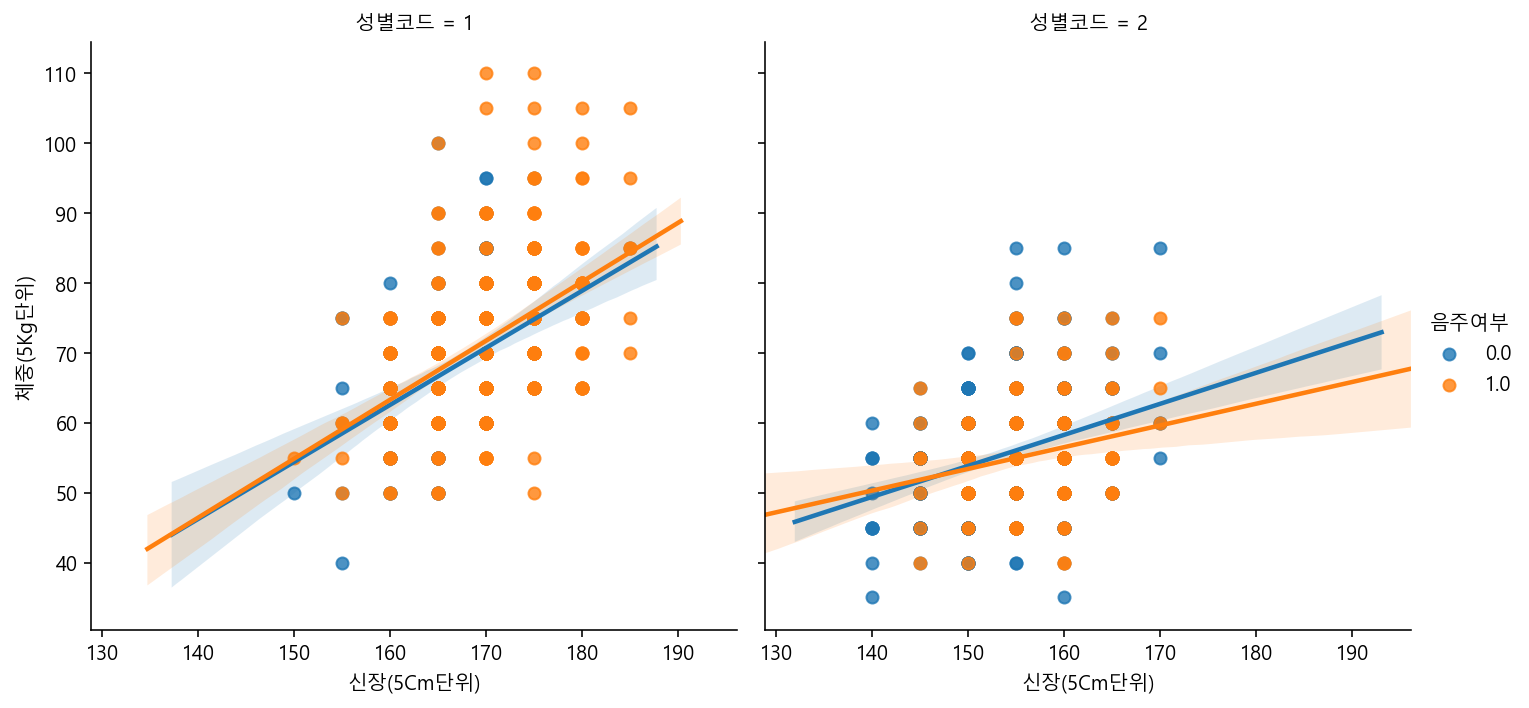

In [61]:
#양의 상관관계가 있다. 반대면 음의 상관관계가 있다.
sns.lmplot(data=df_sample,x="신장(5Cm단위)",y="체중(5Kg단위)",hue="음주여부",
          col="성별코드")

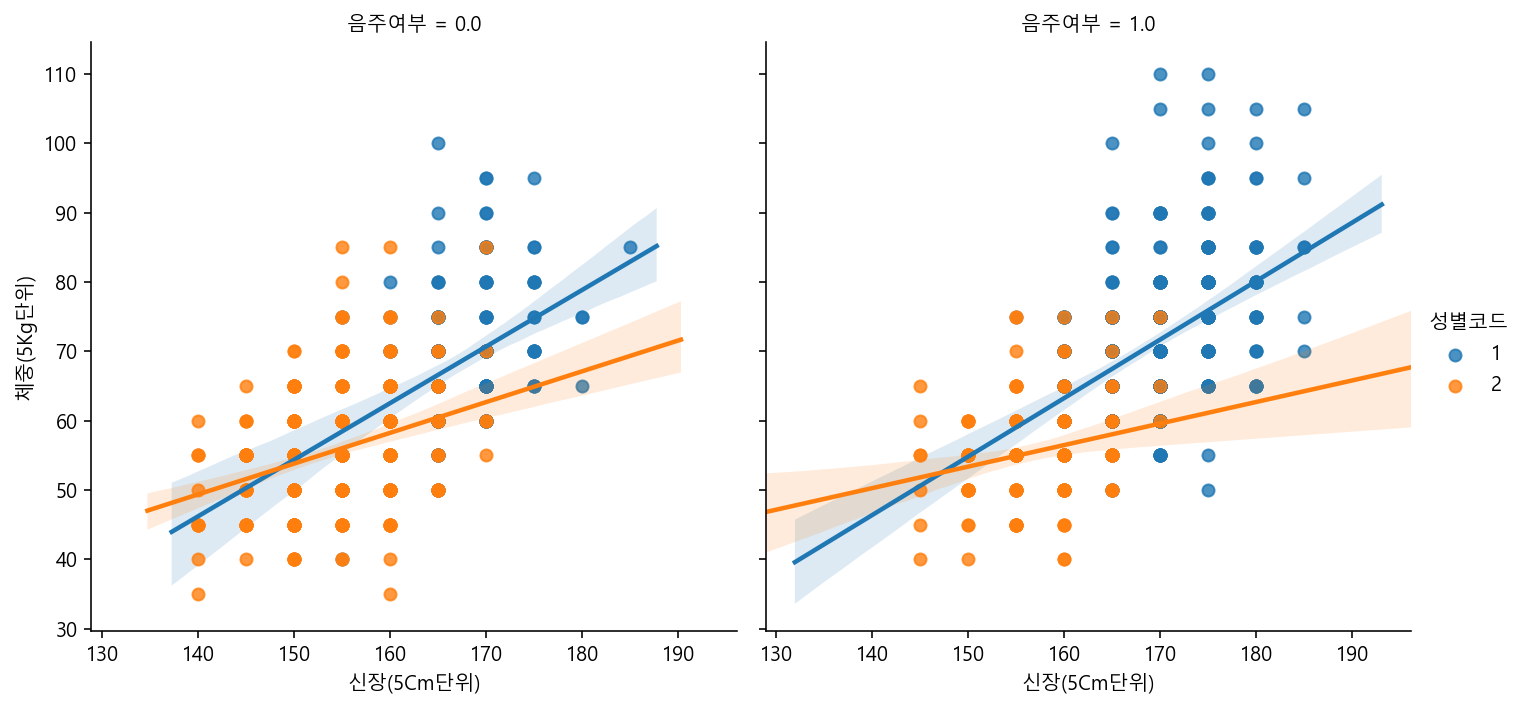

In [62]:
sns.lmplot(data=df_sample,x="신장(5Cm단위)",y="체중(5Kg단위)",hue="성별코드",
          col="음주여부")

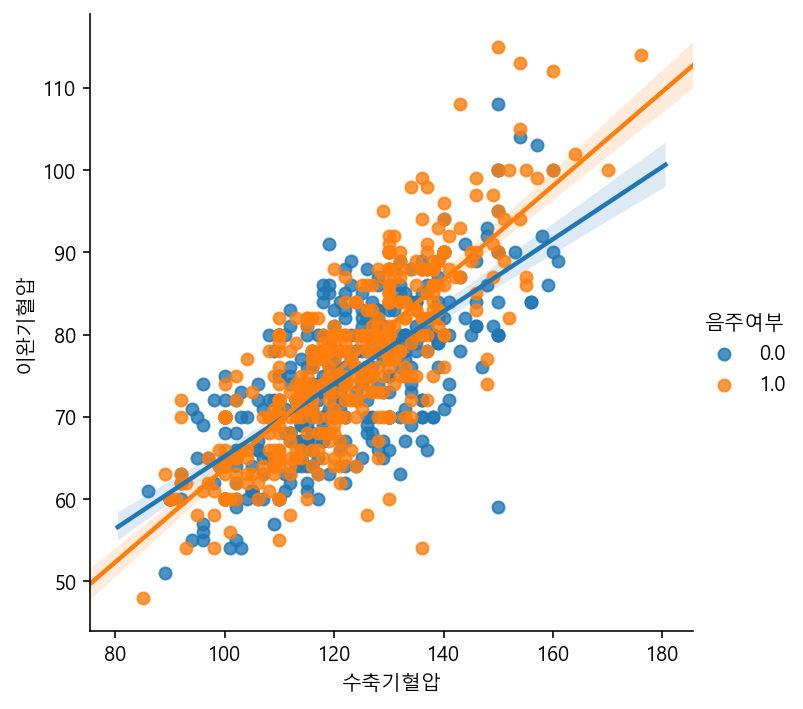

In [63]:
sns.lmplot(data=df_sample,x="수축기혈압",y="이완기혈압",hue="음주여부")

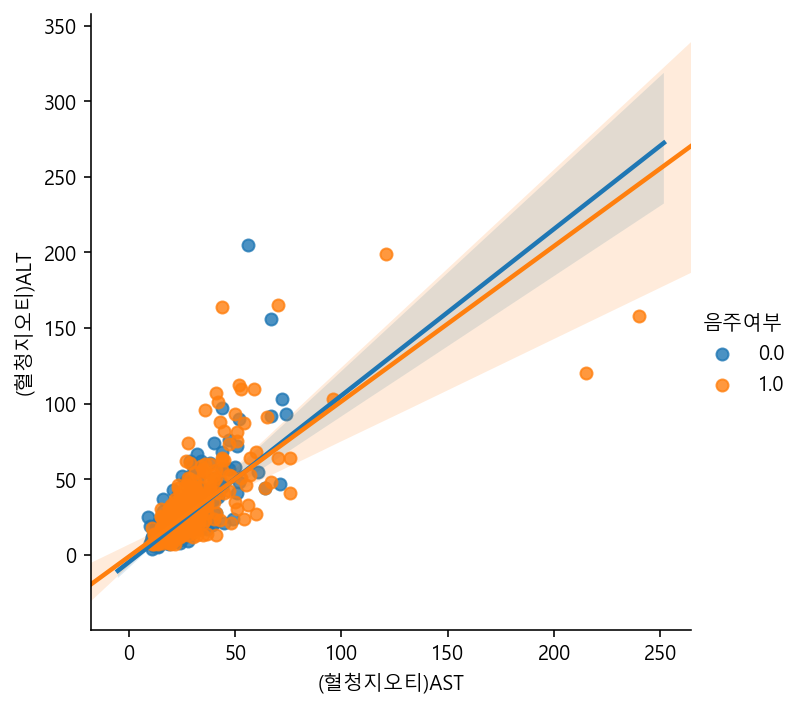

In [64]:
#robust는 이상치의 영향을 덜 받고 그릴수 있는 기능
#seaborn의 장점은 고급 통계를 내가 식을 몰라도 직접 할 수 있다.
sns.lmplot(data=df_sample,x="(혈청지오티)AST",y="(혈청지오티)ALT",hue="음주여부",
          robust=True)

### 15.3 이상치 다루기

In [65]:
#'(혈청지오티)AST' 와 (혈청지오티)ALT가 400이하인 값만 데이터프레임 형태로 추출해서
#df_ASLT라는 변수에 담는다.
df_ASLT =df_sample[(df_sample["(혈청지오티)AST"]<400) & (df_sample["(혈청지오티)ALT"]<400)]

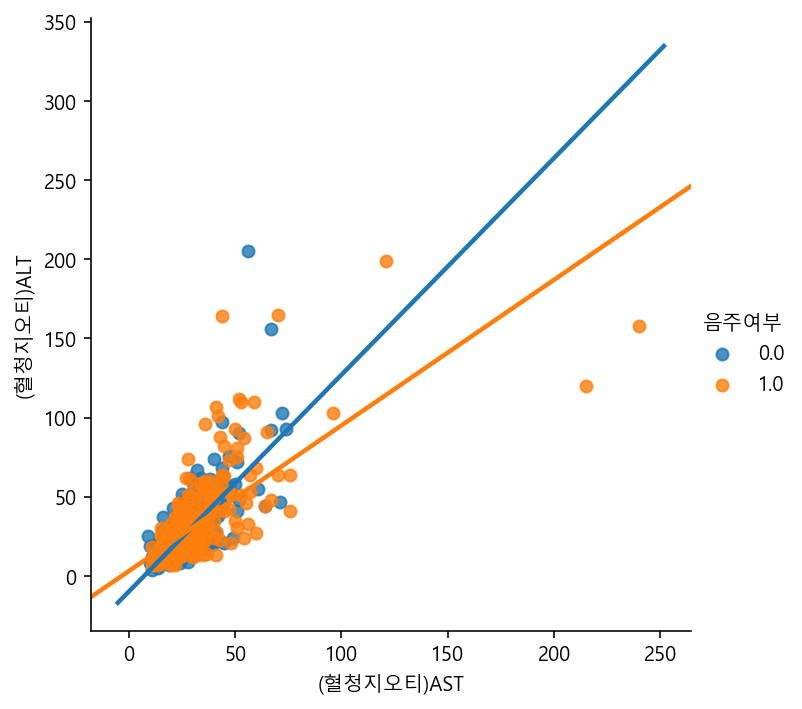

In [66]:
sns.lmplot(data= df_ASLT,x="(혈청지오티)AST",y="(혈청지오티)ALT",hue="음주여부",ci=None)

In [67]:
df_ASLT_high =df[(df["(혈청지오티)AST"]>400) | (df_sample["(혈청지오티)ALT"]>400)]

In [68]:
df_ASLT_high

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
4754    2017     4755     1            9    41        170         55   74.0   
26464   2017    26465     1            7    41        175         70   82.0   
28542   2017    28543     1           10    46        170         55   77.3   
33980   2017    33981     1           17    41        160         55   74.0   
38794   2017    38795     1           16    26        160         55   85.0   
...      ...      ...   ...          ...   ...        ...        ...    ...   
981676  2017   981677     1            6    42        180         70   84.0   
982305  2017   982306     2           16    28        155         50   79.3   
990867  2017   990868     2           11    41        145         45   75.0   
991226  2017   991227     1            6    42        170         80   81.0   
995323  2017   995324     1            7    11        185        105  101.4   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
4754      1.0    0.7  ...  125.0   3.0   1.0         0      NaN    NaN   
26464     1.2    1.2  ...  169.0   1.0   0.0         1      NaN    NaN   
28542     1.2    1.2  ...  233.0   3.0   1.0         1      NaN    NaN   
33980     0.9    0.5  ...   10.0   1.0   0.0         0      NaN    NaN   
38794     0.3    0.5  ...  334.0   2.0   1.0         0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...       ...      ...    ...   
981676    1.2    0.9  ...   45.0   3.0   1.0         0      NaN    NaN   
982305    0.4    0.7  ...   71.0   1.0   0.0         0      NaN    NaN   
990867    0.9    1.2  ...  279.0   1.0   0.0         0      NaN    NaN   
991226    0.7    0.8  ...   49.0   3.0   1.0         0      NaN    NaN   
995323    0.7    0.7  ...  174.0   3.0   1.0         0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
4754        NaN           NaN  NaN  20181126  
26464       NaN           NaN  1.0  20181126  
28542       NaN           NaN  1.0  20181126  
33980       NaN           NaN  NaN  20181126  
38794       NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
981676      NaN           NaN  NaN  20181126  
982305      NaN           NaN  NaN  20181126  
990867      NaN           NaN  NaN  20181126  
991226      NaN           NaN  NaN  20181126  
995323      NaN           NaN  NaN  20181126  

[222 rows x 34 columns]

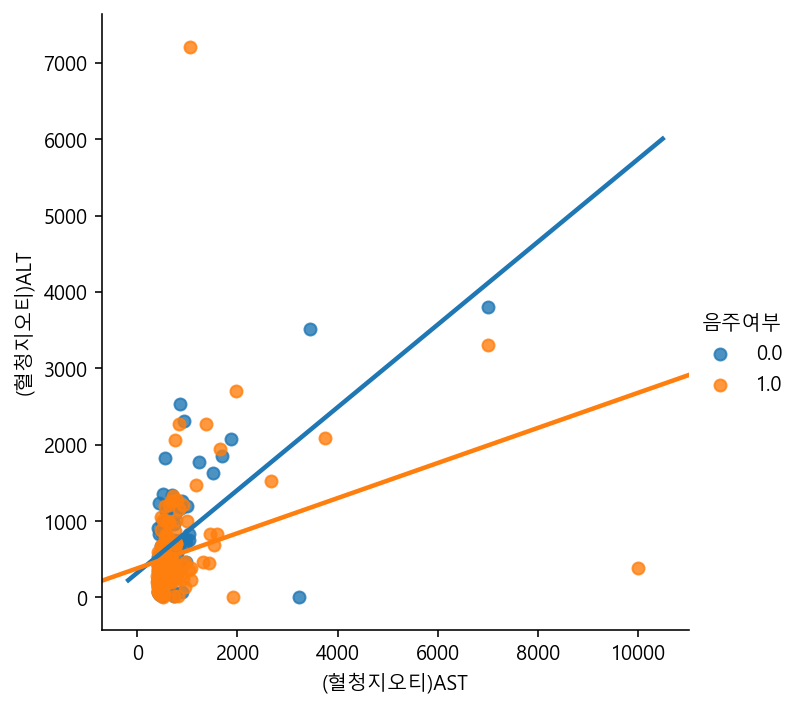

In [69]:
sns.lmplot(data= df_ASLT_high,x="(혈청지오티)AST",y="(혈청지오티)ALT",hue="음주여부",ci=None)

In [70]:
df_ASLT_high_8000= df_ASLT_high[df_ASLT_high["(혈청지오티)AST"]>8000]
df_ASLT_high_8000.iloc[:,10:27]

청력(좌)  청력(우)  수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  HDL콜레스테롤  \
541757    1.0    1.0   96.0   74.0        93.0   161.0      67.0      78.0   

        LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  흡연상태  \
541757      69.0  15.4  1.0      1.2      9999.0       380.0  419.0   3.0   

        음주여부  
541757   1.0

### 15.4 displot
- distplot은 히스토그램을 그려줍니다. 히스토그램은 도수분포표에 따라 그림을 그리는 것을 말합니다. 계급에 따라 데이터의 개수를 세주는 것입니다.
- distplot은 다른 그래프와는 사용법이 조금 다릅니다.

In [71]:
#수치형 데이터로 된 컬럼을 찾기위해 컬럼명만 따로 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [72]:
df_chol=df.loc[df["총콜레스테롤"].notnull(),"총콜레스테롤"] #시리즈형태이다.

In [73]:
df_chol.describe()

count    999957.000000
mean        195.548251
std          38.718205
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: 총콜레스테롤, dtype: float64

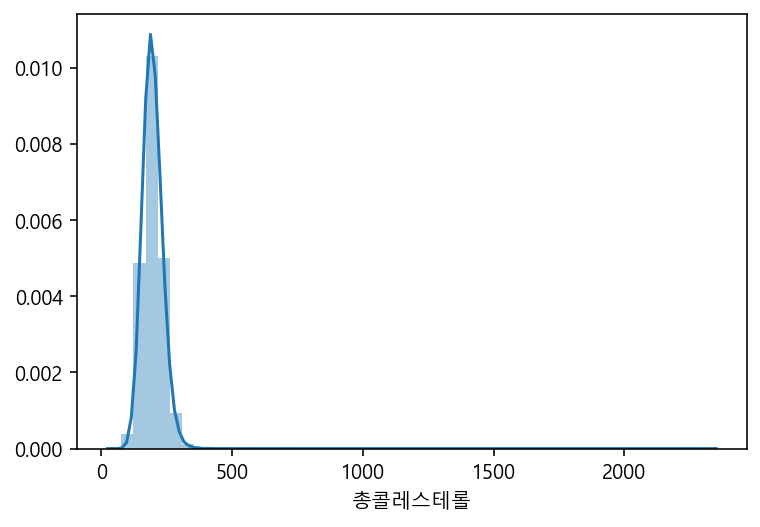

In [74]:
#총콜레스테롤에 따른 displot출력
#시리즈 형태로 들어가야한다, ()안에
sns.distplot(df_chol)

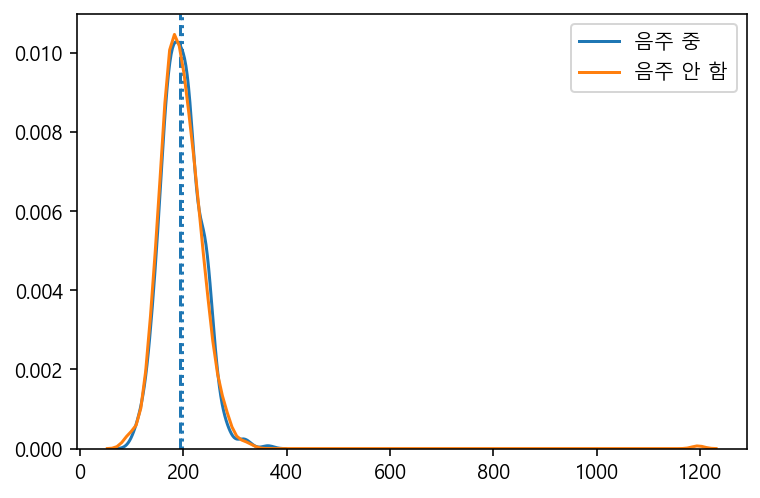

In [75]:
#음주여부가 1인 값에 대한 "총콜레스테롤"을 distplot으로 그림
#kdeplot은 히스토를 빼고 그림
plt.axvline(df_sample["총콜레스테롤"].mean(),linestyle=":")
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df_sample.loc[df["총콜레스테롤"].notnull()&(df["음주여부"]==1),
                    "총콜레스테롤"],label="음주 중")
sns.kdeplot(df_sample.loc[df["총콜레스테롤"].notnull()&(df["음주여부"]==0),
                    "총콜레스테롤"],label="음주 안 함")

C:\Users\wjd48_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\wjd48_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


TypeError: unsupported operand type(s) for /: 'AxesSubplot' and 'int'

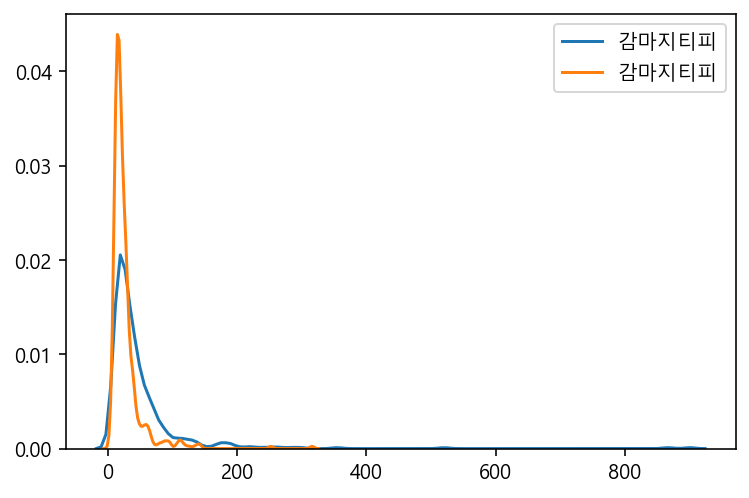

In [76]:
s_1=sns.kdeplot(df_sample.loc[df["음주여부"].notnull()&(df["음주여부"]==1),
                    "감마지티피"])
s_0=sns.kdeplot(df_sample.loc[df["음주여부"].notnull()&(df["음주여부"]==0),
                    "감마지티피"])
sns.distplot(s_1, label="음주 중")
sns.distplot(s_0, label="음주 중")            

## 16. 상관분석

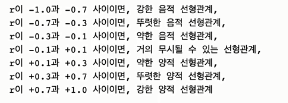

- 두 변수간의 연관정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다.

In [77]:
columns= ['연령대코드(5세단위)','신장(5Cm단위)',
 '체중(5Kg단위)', '허리둘레','시력(좌)','시력(우)','청력(좌)',
 '청력(우)','수축기혈압','이완기혈압','식전혈당(공복혈당)','총콜레스테롤',
 '트리글리세라이드', 'HDL콜레스테롤',
 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
 '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부']
columns

['연령대코드(5세단위)',
 '신장(5Cm단위)',
 '체중(5Kg단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

In [78]:
#기본값으로 피어슨 상관계수
df_small = df_sample[columns]
df_corr =df_small.corr()
df_corr

연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000  -0.380239  -0.200336  0.159797 -0.217613 -0.308829   
신장(5Cm단위)      -0.380239   1.000000   0.665067  0.312230  0.202426  0.236260   
체중(5Kg단위)      -0.200336   0.665067   1.000000  0.785950  0.122194  0.168929   
허리둘레            0.159797   0.312230   0.785950  1.000000  0.017355  0.030809   
시력(좌)          -0.217613   0.202426   0.122194  0.017355  1.000000  0.346265   
시력(우)          -0.308829   0.236260   0.168929  0.030809  0.346265  1.000000   
청력(좌)           0.233960  -0.064044  -0.043727  0.050644 -0.039499 -0.072118   
청력(우)           0.264549  -0.074738  -0.047717  0.073086 -0.081000 -0.102880   
수축기혈압           0.222408   0.063929   0.288983  0.349219 -0.012888 -0.036395   
이완기혈압           0.091006   0.157810   0.324783  0.329256  0.027854  0.001282   
식전혈당(공복혈당)      0.215097   0.005997   0.164926  0.235417 -0.041152 -0.043653   
총콜레스테롤         -0.008847  -0.004133   0.050713  0.036389 -0.052320  0.016831   
트리글리세라이드        0.037474   0.135087   0.260689  0.267643  0.032493  0.070753   
HDL콜레스테롤       -0.095972  -0.207537  -0.330577 -0.311478 -0.045579 -0.068572   
LDL콜레스테롤        0.008560   0.008146   0.043839  0.017287 -0.052768  0.003336   
혈색소            -0.178977   0.541155   0.540191  0.377673  0.142582  0.190303   
요단백             0.058702  -0.007699   0.012154  0.045948 -0.024741 -0.024977   
혈청크레아티닌         0.044958   0.212811   0.170468  0.131421  0.022175  0.080797   
(혈청지오티)AST      0.129357   0.055783   0.193976  0.253549  0.011212  0.003236   
(혈청지오티)ALT     -0.009871   0.159199   0.401756  0.407063  0.080793  0.123455   
감마지티피          -0.015357   0.185091   0.246924  0.234831  0.111903  0.035304   
흡연상태           -0.121132   0.512294   0.392874  0.246296  0.141441  0.089486   
음주여부           -0.275285   0.410946   0.290207  0.134891  0.081130  0.158678   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
연령대코드(5세단위)  0.233960  0.264549  0.222408  0.091006  ... -0.095972  0.008560   
신장(5Cm단위)   -0.064044 -0.074738  0.063929  0.157810  ... -0.207537  0.008146   
체중(5Kg단위)   -0.043727 -0.047717  0.288983  0.324783  ... -0.330577  0.043839   
허리둘레         0.050644  0.073086  0.349219  0.329256  ... -0.311478  0.017287   
시력(좌)       -0.039499 -0.081000 -0.012888  0.027854  ... -0.045579 -0.052768   
시력(우)       -0.072118 -0.102880 -0.036395  0.001282  ... -0.068572  0.003336   
청력(좌)        1.000000  0.565295  0.039115 -0.015526  ... -0.047898  0.006018   
청력(우)        0.565295  1.000000  0.056661 -0.005658  ... -0.069527 -0.032362   
수축기혈압        0.039115  0.056661  1.000000  0.751731  ... -0.093036 -0.007070   
이완기혈압       -0.015526 -0.005658  0.751731  1.000000  ... -0.091701  0.038887   
식전혈당(공복혈당)   0.012104  0.069277  0.218697  0.160601  ... -0.132477  0.043905   
총콜레스테롤       0.008247 -0.047907  0.039290  0.084102  ...  0.025190  0.861641   
트리글리세라이드     0.018695  0.034650  0.233447  0.225436  ... -0.312560  0.064503   
HDL콜레스테롤    -0.047898 -0.069527 -0.093036 -0.091701  ...  1.000000 -0.162307   
LDL콜레스테롤     0.006018 -0.032362 -0.007070  0.038887  ... -0.162307  1.000000   
혈색소         -0.000433 -0.050208  0.169241  0.255690  ... -0.252492  0.068631   
요단백          0.041231  0.081749  0.043110  0.035826  ... -0.058606  0.092367   
혈청크레아티닌      0.016792  0.017758  0.034018  0.081965  ... -0.141626 -0.013668   
(혈청지오티)AST   0.020671 -0.004681  0.133472  0.131482  ... -0.060252 -0.011918   
(혈청지오티)ALT   0.044048 -0.019893  0.163762  0.191155  ... -0.169802  0.022981   
감마지티피       -0.025004 -0.024936  0.191333  0.200150  ... -0.067822  0.007599   
흡연상태         0.007413 -0.042159  0.094145  0.144974  ... -0.213555  0.025842   
음주여부        -0.053293 -0.072404  0.042372  0.108679  ... -0.016938 -0.023031   

                  혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
연령대코드(5세단위) -0.178977  0.058702  0.044958    0.129357   -0.009871 -0.015357   
신장(5Cm단위)    

In [79]:
df_corr["신장(5Cm단위)"].sort_values(ascending=False) #내림차순

신장(5Cm단위)      1.000000
체중(5Kg단위)      0.665067
혈색소            0.541155
흡연상태           0.512294
음주여부           0.410946
허리둘레           0.312230
시력(우)          0.236260
혈청크레아티닌        0.212811
시력(좌)          0.202426
감마지티피          0.185091
(혈청지오티)ALT     0.159199
이완기혈압          0.157810
트리글리세라이드       0.135087
수축기혈압          0.063929
(혈청지오티)AST     0.055783
LDL콜레스테롤       0.008146
식전혈당(공복혈당)     0.005997
총콜레스테롤        -0.004133
요단백           -0.007699
청력(좌)         -0.064044
청력(우)         -0.074738
HDL콜레스테롤      -0.207537
연령대코드(5세단위)   -0.380239
Name: 신장(5Cm단위), dtype: float64

In [80]:
df_corr.loc[df_corr["신장(5Cm단위)"]>0.3,"신장(5Cm단위)"]

신장(5Cm단위)    1.000000
체중(5Kg단위)    0.665067
허리둘레         0.312230
혈색소          0.541155
흡연상태         0.512294
음주여부         0.410946
Name: 신장(5Cm단위), dtype: float64

In [82]:
#음주여부에 대한 상관관게가 특성 수치 이상인 데이터
df_corr.loc[df_corr["음주여부"]>0.25,"음주여부"]

신장(5Cm단위)    0.410946
체중(5Kg단위)    0.290207
혈색소          0.312005
흡연상태         0.344286
음주여부         1.000000
Name: 음주여부, dtype: float64

In [84]:
#혈색소에 대한 상관관게가 특성 수치 이상인 데이터
#내림차순으로 상위 7개
df_corr["혈색소"].sort_values(ascending=False).head(7)

혈색소           1.000000
신장(5Cm단위)     0.541155
체중(5Kg단위)     0.540191
흡연상태          0.434467
허리둘레          0.377673
(혈청지오티)ALT    0.331891
음주여부          0.312005
Name: 혈색소, dtype: float64

In [85]:
#감마지티피에 대한 상관관게가 특성 수치 이상인 데이터
df_corr["감마지티피"].sort_values(ascending=False).head(7)

감마지티피         1.000000
(혈청지오티)AST    0.531529
(혈청지오티)ALT    0.424481
트리글리세라이드      0.271554
체중(5Kg단위)     0.246924
혈색소           0.245109
허리둘레          0.234831
Name: 감마지티피, dtype: float64

### 16.2 heatmap

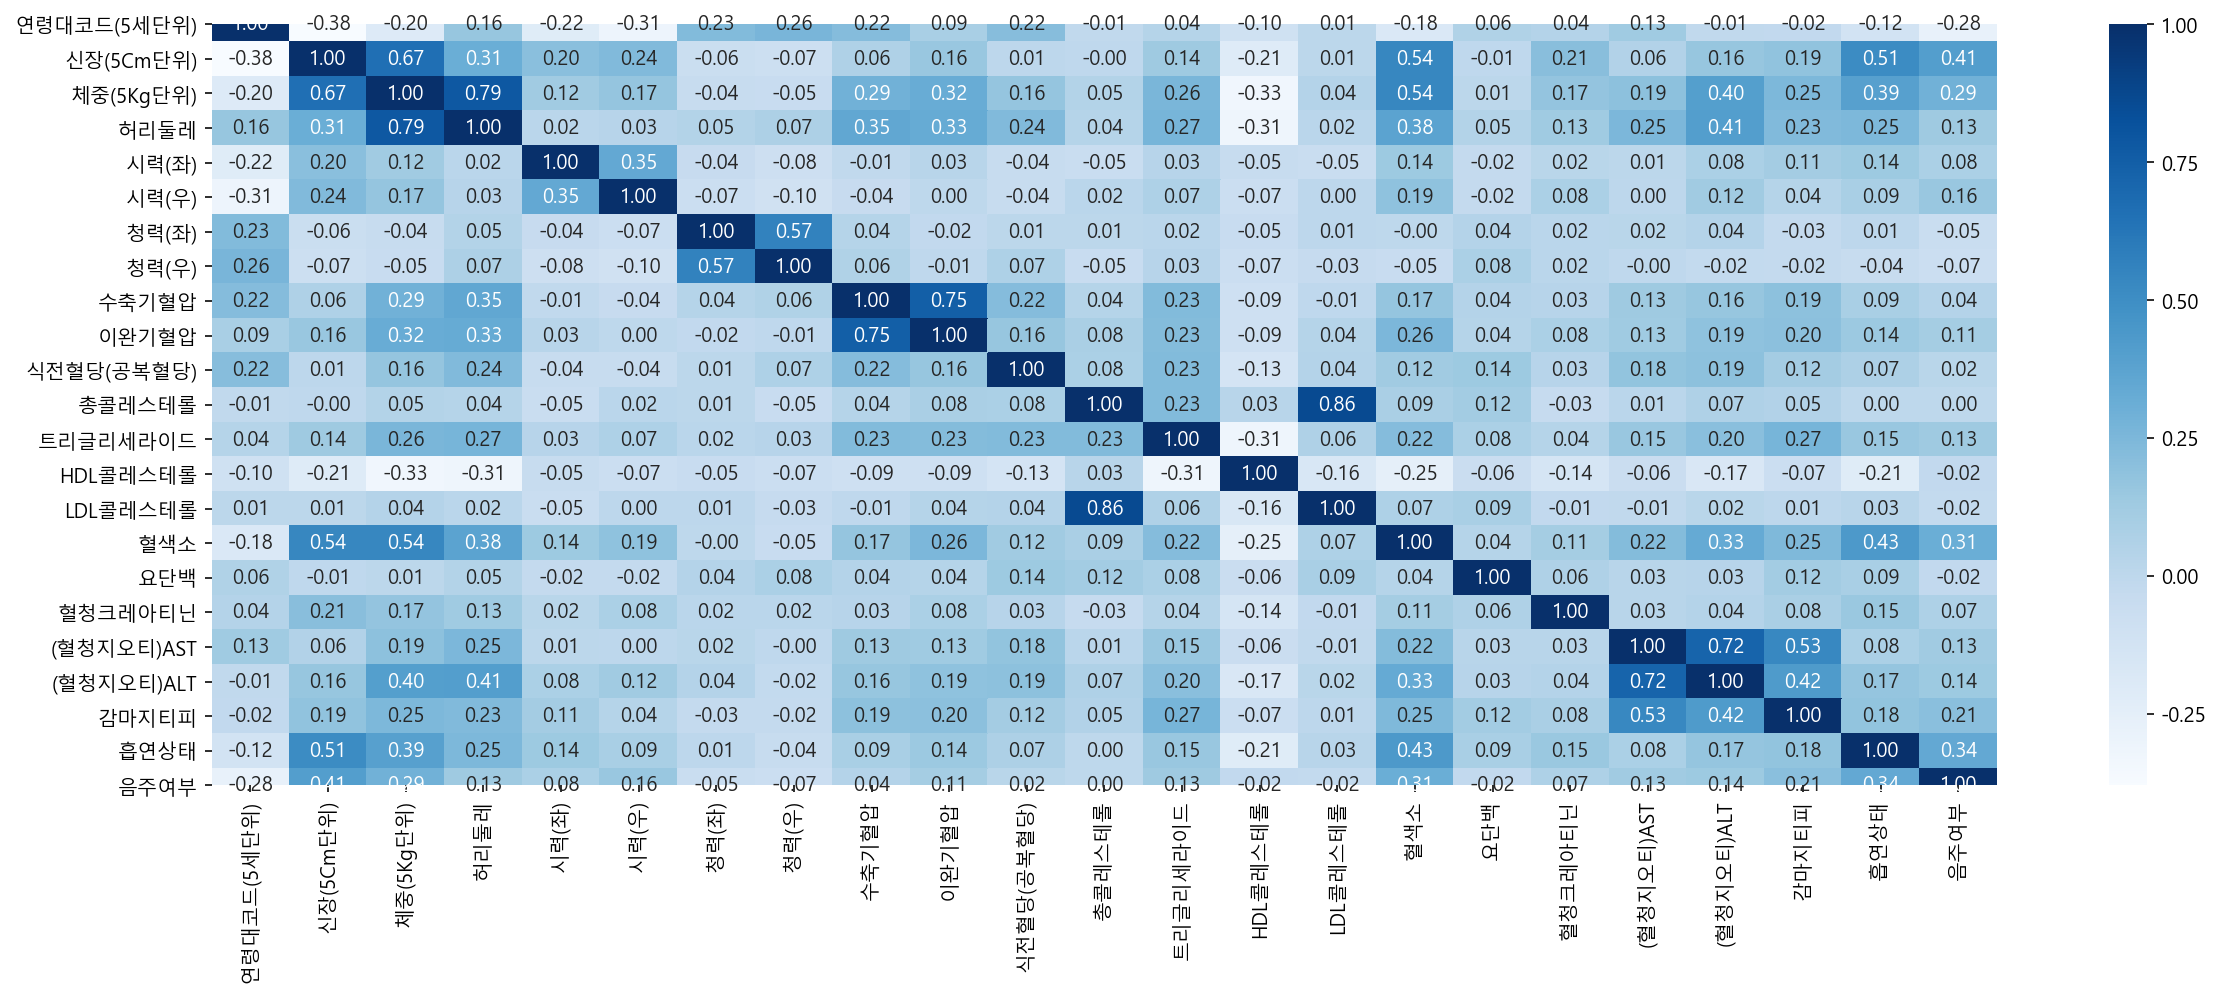

In [91]:
#annot는 상관계수 숫자표시
#fmt는 소숫점표시
#Blues 높을수록 진하게 표시한다.
plt.figure(figsize=(20,7))
sns.heatmap(df_corr,annot=True,fmt=".2f",cmap="Blues")

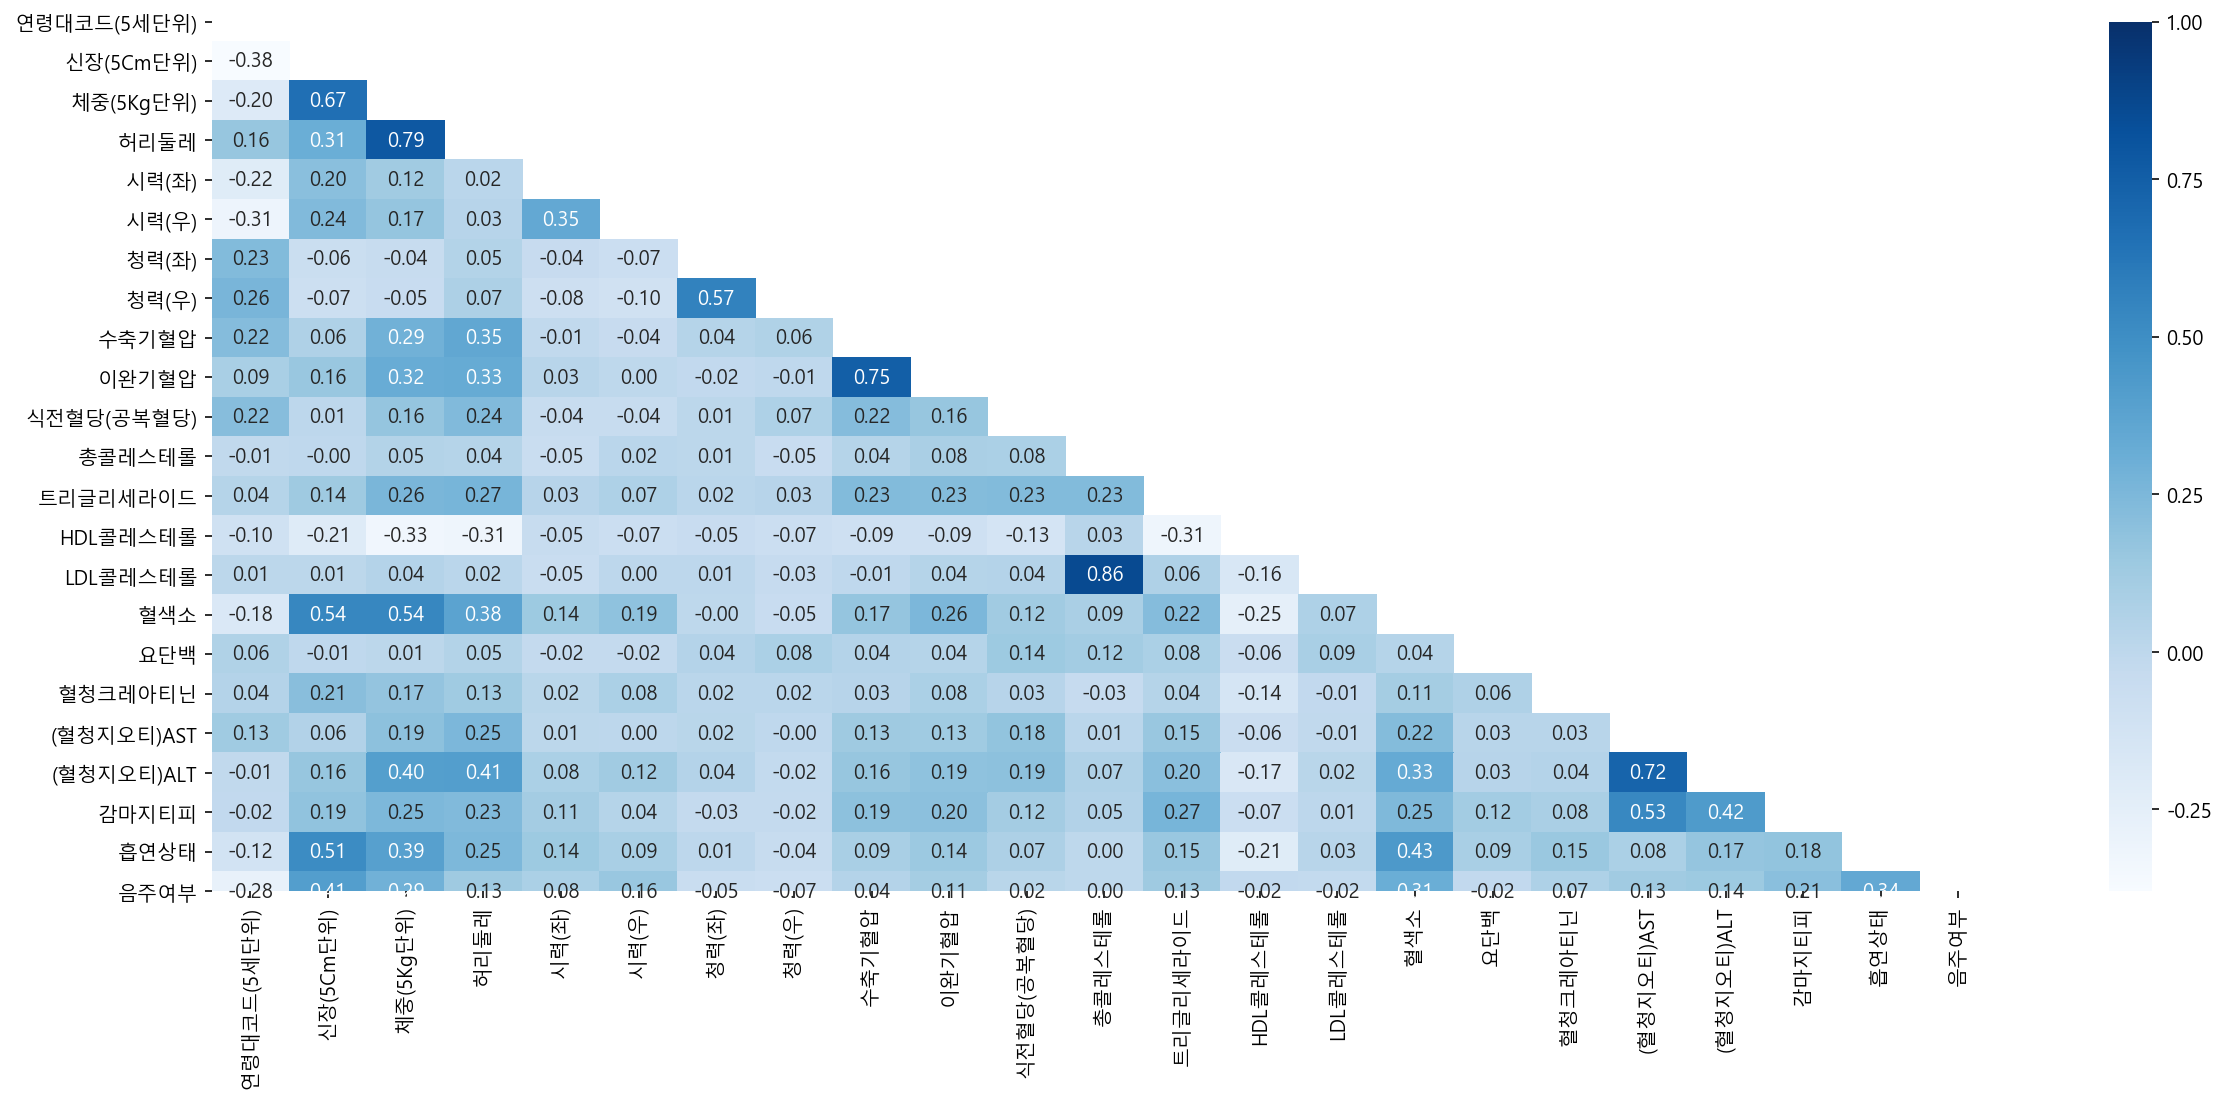

In [96]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

plt.figure(figsize=(20,8))
sns.heatmap(df_corr,annot=True,fmt=".2f",cmap="Blues",mask=mask)